### Imports - импортируем все необходимое

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler                    # MMS - масштабирует данные, SS - стандартизация
from sklearn.model_selection import train_test_split, GridSearchCV, KFold         # Способ разделения данных на обучающую и тестовую выборки
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score     # MAE - ср. абс. ошибка, MSE - ср. квад. ошибка, R2 - оценка достоверности модели
from matplotlib.collections import PathCollection
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pickle
from functools import reduce
# import tensorflow as tf
import json
import joblib
# import csv
# from scipy.stats import gaussian_kde
# from sklearn.compose import ColumnTransformer                                   # Позволяет осуществлять операции со столбцами таблиц
# from sklearn.pipeline import Pipeline                                           # Для создания массива действий
pd.set_option('display.max_columns', 500)                                         # Полностью отображаем все, что есть в столбцах, не превышая размеры оперативки компьютера

### Data extraction - загружаем датасет из его исходных файлов

Для начала посмотрим предоставленные таблицы:
- dataset_1 - первая таблица (большая)
- dataset_2 - вторая таблица

In [111]:
dataset_1 = pd.read_csv("D:\VKR_Bau\dataset\X_bp.csv", index_col='id', sep=';')     # Читаем файл .csv (переделала из .excel), берем за индекс строк первый столбец, разделитель - ;

dataset_1

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\rebrikova_oo\AppData\Local\Temp\ipykernel_4692\1943632499.py:1: SyntaxWarning: invalid escape sequence '\V'
  dataset_1 = pd.read_csv("D:\VKR_Bau\dataset\X_bp.csv", index_col='id', sep=';')     # Читаем файл .csv (переделала из .excel), берем за индекс строк первый столбец, разделитель - ;


Соотношение матрица-наполнитель Плотность, кг/м3 Модуль упругости, ГПа  \
id                                                                            
0                        1,857142857             2030           738,7368421   
1                        1,857142857             2030           738,7368421   
2                        1,857142857             2030           738,7368421   
3                        1,857142857             2030           738,7368421   
4                        2,771331058             2030                   753   
...                              ...              ...                   ...   
1018                     2,271346377      1952,087902            912,855545   
1019                     3,444022328      2050,089171           444,7326336   
1020                     3,280604476      1972,372865           416,8365235   
1021                     3,705351215      2066,799773           741,4755167   
1022                     3,808020036      1890,413468            417,316232   

     Количество отвердителя, м.% Содержание эпоксидных групп,%_2  \
id                                                                 
0                             30                     22,26785714   
1                             50                           23,75   
2                           49,9                              33   
3                            129                           21,25   
4                         111,86                     22,26785714   
...                          ...                             ...   
1018                 86,99218257                     20,12324867   
1019                 145,9819782                     19,59976869   
1020                 110,5334774                     23,95750159   
1021                 141,3979628                     19,24694474   
1022                 129,1834163                     27,47476302   

     Температура вспышки, С_2 Поверхностная плотность, г/м2  \
id                                                            
0                         100                           210   
1                 284,6153846                           210   
2                 284,6153846                           210   
3                         300                           210   
4                 284,6153846                           210   
...                       ...                           ...   
1018               324,774576                   209,1986996   
1019              254,2154008                     350,66083   
1020              248,4230469                    740,142791   
1021              275,7798396                   641,4681522   
1022              300,9527077                   758,7478819   

     Модуль упругости при растяжении, ГПа Прочность при растяжении, МПа  \
id                                                                        
0                                      70                          3000   
1                                      70                          3000   
2                                      70                          3000   
3                                      70                          3000   
4                                      70                          3000   
...                                   ...                           ...   
1018                          73,09096083                   2387,292495   
1019                          72,92082684                   2360,392784   
1020                           74,7343437                    2662,90604   
1021                          74,04270842                   2071,715856   
1022                            74,309704                   2856,328932   

     Потребление смолы, г/м2  
id                            
0                        220  
1                        220  
2                        220  
3                        220  
4                        220  
...                      ...  
1018             125,0076686  
1019             

In [112]:
dataset_2 = pd.read_csv("D:\VKR_Bau\dataset\X_nup.csv", index_col='id', sep=';')

dataset_2

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\rebrikova_oo\AppData\Local\Temp\ipykernel_4692\2422110538.py:1: SyntaxWarning: invalid escape sequence '\V'
  dataset_2 = pd.read_csv("D:\VKR_Bau\dataset\X_nup.csv", index_col='id', sep=';')


Угол нашивки, град  Шаг нашивки Плотность нашивки
id                                                     
0                      0            4                57
1                      0            4                60
2                      0            4                70
3                      0            5                47
4                      0            5                57
...                  ...          ...               ...
1035                  90  8,088110993       47,75917659
1036                  90  7,619137864       66,93193235
1037                  90  9,800925693       72,85828626
1038                  90  10,07985856        65,5194794
1039                  90  9,021042652       66,92014304

[1040 rows x 3 columns]

### Data exploration - разведочный анализ данных (EDA)

Ниже представлен разведочный анализ данных. 
Здесь же по ходу выполнения задания были добавлены небольшие преобразования, такие как замена знаков для получения статистических данных, поскольку для этого необходимо иметь определенный тип данных. А также объединение двух таблиц для удобной работы с dataset. 
Также часто присутствуют предыдущие шаги, например, формат вывода - 6 или 9 знаков после запятой - для итераций 1 и 2, до появления идеи о более тщательной фильтрации dataset.

In [113]:
print(dataset_1.dtypes)                                                              # Проверяем тип данных

Соотношение матрица-наполнитель         object
Плотность, кг/м3                        object
Модуль упругости, ГПа                   object
Количество отвердителя, м.%             object
Содержание эпоксидных групп,%_2         object
Температура вспышки, С_2                object
Поверхностная плотность, г/м2           object
Модуль упругости при растяжении, ГПа    object
Прочность при растяжении, МПа           object
Потребление смолы, г/м2                 object
dtype: object


In [114]:
print(dataset_2.dtypes)

Угол нашивки, град     int64
Шаг нашивки           object
Плотность нашивки     object
dtype: object


In [115]:
dataset_1.describe()                                                                # Смотрим статистику -- вывод говорит от том, что данные имеют тип object

Соотношение матрица-наполнитель Плотность, кг/м3 Модуль упругости, ГПа  \
count                             1023             1023                  1023   
unique                            1014             1013                  1020   
top                        1,857142857             2030           738,7368421   
freq                                 4                6                     4   

       Количество отвердителя, м.% Содержание эпоксидных групп,%_2  \
count                         1023                            1023   
unique                        1005                            1004   
top                            129                           21,25   
freq                            12                              12   

       Температура вспышки, С_2 Поверхностная плотность, г/м2  \
count                      1023                          1023   
unique                     1003                          1004   
top                         300                           210   
freq                         12                             9   

       Модуль упругости при растяжении, ГПа Прочность при растяжении, МПа  \
count                                  1023                          1023   
unique                                 1004                          1004   
top                                      70                          3000   
freq                                      9                             9   

       Потребление смолы, г/м2  
count                     1023  
unique                    1003  
top                        220  
freq                        14

In [116]:
dataset_1.info()                                                                    # Выводим информацию о данных в файле

<class 'pandas.core.frame.DataFrame'>
Index: 1023 entries, 0 to 1022
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Соотношение матрица-наполнитель       1023 non-null   object
 1   Плотность, кг/м3                      1023 non-null   object
 2   Модуль упругости, ГПа                 1023 non-null   object
 3   Количество отвердителя, м.%           1023 non-null   object
 4   Содержание эпоксидных групп,%_2       1023 non-null   object
 5   Температура вспышки, С_2              1023 non-null   object
 6   Поверхностная плотность, г/м2         1023 non-null   object
 7   Модуль упругости при растяжении, ГПа  1023 non-null   object
 8   Прочность при растяжении, МПа         1023 non-null   object
 9   Потребление смолы, г/м2               1023 non-null   object
dtypes: object(10)
memory usage: 87.9+ KB


In [117]:
dataset_2.describe()                                                                 # Смотрим статистику

Угол нашивки, град
count      1040.000000000
mean         45.000000000
std          45.021650230
min           0.000000000
25%           0.000000000
50%          45.000000000
75%          90.000000000
max          90.000000000

In [118]:
dataset_2.info()                                                                     # Выводим информацию о данных в файле

<class 'pandas.core.frame.DataFrame'>
Index: 1040 entries, 0 to 1039
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Угол нашивки, град  1040 non-null   int64 
 1   Шаг нашивки         1040 non-null   object
 2   Плотность нашивки   1040 non-null   object
dtypes: int64(1), object(2)
memory usage: 32.5+ KB


In [119]:
dataset_1 = dataset_1.replace(',', '.', regex=True)                                  # Заменяем все символы "," на ".", чтобы тип данных стал числовым
dataset_1 = dataset_1.astype(float).round(9)                                         # Преобразовываем все значения к одному типу данных - float64 и округляем до 9 знаков после запятой
dataset_1.to_csv('X_bp1.csv', float_format= lambda x: f"{x:.9f}")                    # Записываем полученное в новый .csv файл

In [120]:
dataset_2 = dataset_2.replace(',', '.', regex=True)                                  # Те же преобразования для второй таблицы                                
dataset_2 = dataset_2.astype(float).round(9)                                         
dataset_2.to_csv('X_nup1.csv', float_format= lambda x: f"{x:.9f}")                    

In [121]:
dataset_1_new = pd.read_csv("D:\VKR_Bau\X_bp1.csv", index_col='id', sep=',')         # Читаем новый .csv файл, убеждаемся в том, что все хорошо

pd.set_option('display.float_format', '{:.9f}'.format)                               # Если не отображаются числа с точностью 9 знаков после запятой
# df                                                                                 # Проверяем, что значения в каждой ячейке имеют одинаковую точность          
# print(df.dtypes)                                                                   # Проверяем, что тип данных - float64
dataset_1_new.describe()                                                             # Выводим статистику (количество не пустых значений, среднее значение, стандартное отклонение,
                                                                                     #  минимальное значение, первый квартиль, медиана, третий квартиль, максимальное значение)

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\rebrikova_oo\AppData\Local\Temp\ipykernel_4692\3412977065.py:1: SyntaxWarning: invalid escape sequence '\V'
  dataset_1_new = pd.read_csv("D:\VKR_Bau\X_bp1.csv", index_col='id', sep=',')         # Читаем новый .csv файл, убеждаемся в том, что все хорошо


Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                   1023.000000000    1023.000000000   
mean                       2.930365773    1975.734888111   
std                        0.913222236      73.729230542   
min                        0.389402605    1731.764635000   
25%                        2.317886644    1924.155466500   
50%                        2.906877650    1977.621657000   
75%                        3.552659897    2021.374374500   
max                        5.591741599    2207.773481000   

       Модуль упругости, ГПа  Количество отвердителя, м.%  \
count         1023.000000000               1023.000000000   
mean           739.923232754                110.570768648   
std            330.231580557                 28.295911289   
min              2.436908754                 17.740274560   
25%            500.047451750                 92.443497450   
50%            739.664327700                110.564839900   
75%            961.812526500                129.730365700   
max           1911.536477000                198.953207200   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                   1023.000000000            1023.000000000   
mean                      22.244389548             285.882151349   
std                        2.406301292              40.943259954   
min                       14.254985500             100.000000000   
25%                       20.608034265             259.066527800   
50%                       22.230743760             285.896812300   
75%                       23.961933765             313.002105500   
max                       33.000000000             413.273418200   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                 1023.000000000                        1023.000000000   
mean                   482.731833041                          73.328571250   
std                    281.314690244                           3.118982889   
min                      0.603739925                          64.054060560   
25%                    266.816645350                          71.245018370   
50%                    451.864365200                          73.268804590   
75%                    693.225017150                          75.356612040   
max                   1399.542362000                          82.682051040   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
count                 1023.000000000           1023.000000000  
mean                  2466.922842692            218.423143675  
std                    485.628006276             59.735930874  
min                   1036.856605000             33.803025530  
25%                   2135.850448000            179.627520250  
50%                   2459.524526000            219.198882200  
75%                   2767.193119000            257.481724050  
max                   3848.436732000            414.590628400

In [122]:
dataset_2_new = pd.read_csv("D:\VKR_Bau\X_nup1.csv", index_col='id', sep=',')        # Читаем новый .csv файл, убеждаемся в том, что все хорошо

pd.set_option('display.float_format', '{:.9f}'.format)                               # Если не отображаются числа с точностью 9 знаов после запятой
# df                                                                                 # Проверяем, что значения в каждой ячейке имеют одинаковую точность          
# print(df.dtypes)                                                                   # Проверяем, что тип данных - float64
dataset_2_new.describe()  

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\rebrikova_oo\AppData\Local\Temp\ipykernel_4692\1527991506.py:1: SyntaxWarning: invalid escape sequence '\V'
  dataset_2_new = pd.read_csv("D:\VKR_Bau\X_nup1.csv", index_col='id', sep=',')        # Читаем новый .csv файл, убеждаемся в том, что все хорошо


Угол нашивки, град    Шаг нашивки  Плотность нашивки
count      1040.000000000 1040.000000000     1040.000000000
mean         45.000000000    6.911385018       57.248399467
std          45.021650230    2.555180532       12.332437967
min           0.000000000    0.000000000        0.000000000
25%           0.000000000    5.102256190       49.970740107
50%          45.000000000    6.938000218       57.413593645
75%          90.000000000    8.587662364       65.107235232
max          90.000000000   14.440521880      103.988901300

In [123]:
print(dataset_1_new.isna().sum())                                                      # Проверяем наличие пропусков в данных

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
Модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64


In [124]:
print(dataset_2_new.isna().sum())                                                      # Аналогично для 2 таблицы

Угол нашивки, град    0
Шаг нашивки           0
Плотность нашивки     0
dtype: int64


In [125]:
dataset_result = dataset_1_new.merge(dataset_2_new, on = 'id', how = 'inner')          # Объединение двух dataset 
dataset_result.to_csv('d1xd2.csv', float_format= lambda x: f"{x:.9f}")                 # На всякий случай сохраняем результат в .csv файл

dataset_result                                                                         # Поскольку второй датасет больше первого, он "обрежется" по размеру первого

Соотношение матрица-наполнитель  Плотность, кг/м3  \
id                                                        
0                         1.857142857    2030.000000000   
1                         1.857142857    2030.000000000   
2                         1.857142857    2030.000000000   
3                         1.857142857    2030.000000000   
4                         2.771331058    2030.000000000   
...                               ...               ...   
1018                      2.271346377    1952.087902000   
1019                      3.444022328    2050.089171000   
1020                      3.280604476    1972.372865000   
1021                      3.705351215    2066.799773000   
1022                      3.808020036    1890.413468000   

      Модуль упругости, ГПа  Количество отвердителя, м.%  \
id                                                         
0             738.736842100                 30.000000000   
1             738.736842100                 50.000000000   
2             738.736842100                 49.900000000   
3             738.736842100                129.000000000   
4             753.000000000                111.860000000   
...                     ...                          ...   
1018          912.855545000                 86.992182570   
1019          444.732633600                145.981978200   
1020          416.836523500                110.533477400   
1021          741.475516700                141.397962800   
1022          417.316232000                129.183416300   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
id                                                                
0                        22.267857140             100.000000000   
1                        23.750000000             284.615384600   
2                        33.000000000             284.615384600   
3                        21.250000000             300.000000000   
4                        22.267857140             284.615384600   
...                               ...                       ...   
1018                     20.123248670             324.774576000   
1019                     19.599768690             254.215400800   
1020                     23.957501590             248.423046900   
1021                     19.246944740             275.779839600   
1022                     27.474763020             300.952707700   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
id                                                                          
0                     210.000000000                          70.000000000   
1                     210.000000000                          70.000000000   
2                     210.000000000                          70.000000000   
3                     210.000000000                          70.000000000   
4                     210.000000000                          70.000000000   
...                             ...                                   ...   
1018                  209.198699600                          73.090960830   
1019                  350.660830000                          72.920826840   
1020                  740.142791000                          74.734343700   
1021                  641.468152200                          74.042708420   
1022                  758.747881900                          74.309704000   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
id                                                             
0                    3000.000000000            220.000000000   
1                    3000.000000000            220.000000000   
2                    3000.000000000            220.000000000   
3                    3000.000000000            220.000000000   
4                    3000.000000000            220.000000000   
...                             ...                      ...   
1018                 2387.292495000            125.007668600   
1019   

In [126]:
dataset_result.shape                                                                  # Выводим размерность dataset

(1023, 13)

In [127]:
dataset_result.head()                                                                 # Выводим первые 5 строк полученного dataset

Соотношение матрица-наполнитель  Плотность, кг/м3  Модуль упругости, ГПа  \
id                                                                             
0                       1.857142857    2030.000000000          738.736842100   
1                       1.857142857    2030.000000000          738.736842100   
2                       1.857142857    2030.000000000          738.736842100   
3                       1.857142857    2030.000000000          738.736842100   
4                       2.771331058    2030.000000000          753.000000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
id                                                                 
0                  30.000000000                     22.267857140   
1                  50.000000000                     23.750000000   
2                  49.900000000                     33.000000000   
3                 129.000000000                     21.250000000   
4                 111.860000000                     22.267857140   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
id                                                            
0              100.000000000                  210.000000000   
1              284.615384600                  210.000000000   
2              284.615384600                  210.000000000   
3              300.000000000                  210.000000000   
4              284.615384600                  210.000000000   

    Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
id                                                                        
0                           70.000000000                 3000.000000000   
1                           70.000000000                 3000.000000000   
2                           70.000000000                 3000.000000000   
3                           70.000000000                 3000.000000000   
4                           70.000000000                 3000.000000000   

    Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
id                                                             
0             220.000000000         0.000000000  4.000000000   
1             220.000000000         0.000000000  4.000000000   
2             220.000000000         0.000000000  4.000000000   
3             220.000000000         0.000000000  5.000000000   
4             220.000000000         0.000000000  5.000000000   

    Плотность нашивки  
id                     
0        57.000000000  
1        60.000000000  
2        70.000000000  
3        47.000000000  
4        57.000000000

In [128]:
dataset_result.tail()                                                                 # Выводим последние 5 строк полученного dataset

Соотношение матрица-наполнитель  Плотность, кг/м3  \
id                                                        
1018                      2.271346377    1952.087902000   
1019                      3.444022328    2050.089171000   
1020                      3.280604476    1972.372865000   
1021                      3.705351215    2066.799773000   
1022                      3.808020036    1890.413468000   

      Модуль упругости, ГПа  Количество отвердителя, м.%  \
id                                                         
1018          912.855545000                 86.992182570   
1019          444.732633600                145.981978200   
1020          416.836523500                110.533477400   
1021          741.475516700                141.397962800   
1022          417.316232000                129.183416300   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
id                                                                
1018                     20.123248670             324.774576000   
1019                     19.599768690             254.215400800   
1020                     23.957501590             248.423046900   
1021                     19.246944740             275.779839600   
1022                     27.474763020             300.952707700   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
id                                                                          
1018                  209.198699600                          73.090960830   
1019                  350.660830000                          72.920826840   
1020                  740.142791000                          74.734343700   
1021                  641.468152200                          74.042708420   
1022                  758.747881900                          74.309704000   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
id                                                             
1018                 2387.292495000            125.007668600   
1019                 2360.392784000            117.730098600   
1020                 2662.906040000            236.606764100   
1021                 2071.715856000            197.126066700   
1022                 2856.328932000            194.754342300   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
id                                                        
1018        90.000000000  9.076380351       47.019770470  
1019        90.000000000 10.565613970       53.750789690  
1020        90.000000000  4.161153983       67.629684150  
1021        90.000000000  6.313200726       58.261073910  
1022        90.000000000  6.078901595       77.434468000

#### Рисуем гистограммы, проверяем наличие выбросов

Построим "Тепловую карту" для определения зависимости переменных друг от друга.

Text(0.5, 1.0, 'Треугольная тепловая карта корреляции')

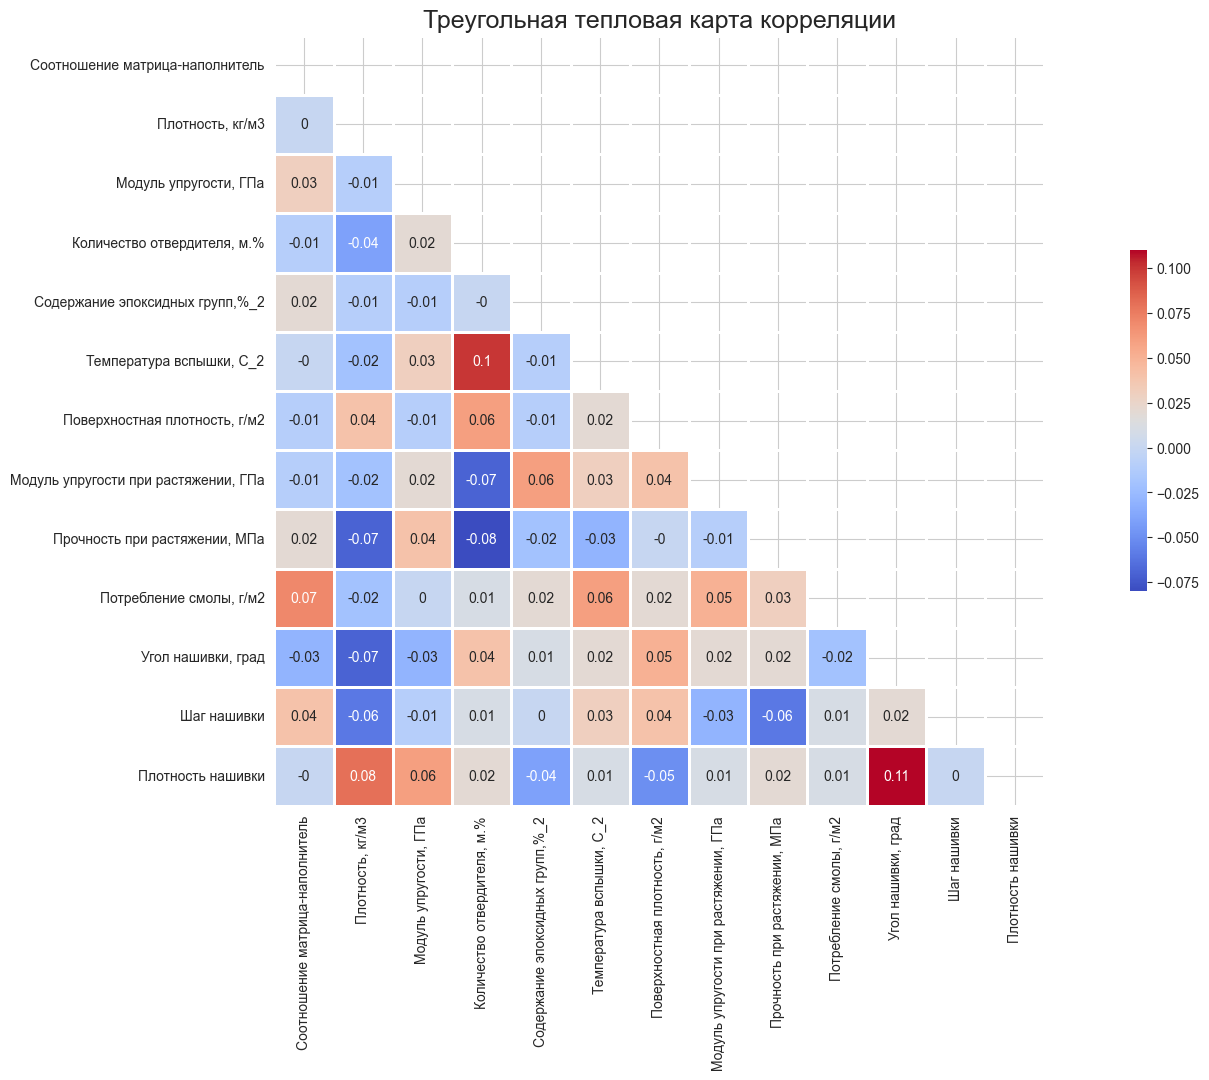

In [129]:
sns.set_style('whitegrid')
mask = np.triu(np.ones_like(dataset_result.corr(), dtype = bool))                     # Изолируем верхний треугольник тепловой карты
plt.figure(figsize = (22, 10))
heatmap = sns.heatmap(dataset_result.corr().round(2), annot = True, square = True, cmap = 'coolwarm', cbar_kws = {'fraction': 0.01}, linewidths = 2, mask = mask)
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict = {'fontsize': 18})

По тепловой карте видно: чем светлее участок, тем "прямее" зависимость одной переменной от другой. Темная область показывает наличие обратной зависимости между переменными. Анализ тепловой карты иллюстрирует практически полное отсутствие взаимосвязи между переменными, однако, наблюдается слабая зависимость между некоторыми переменными, обозначенная красным и темно-синим цветом.

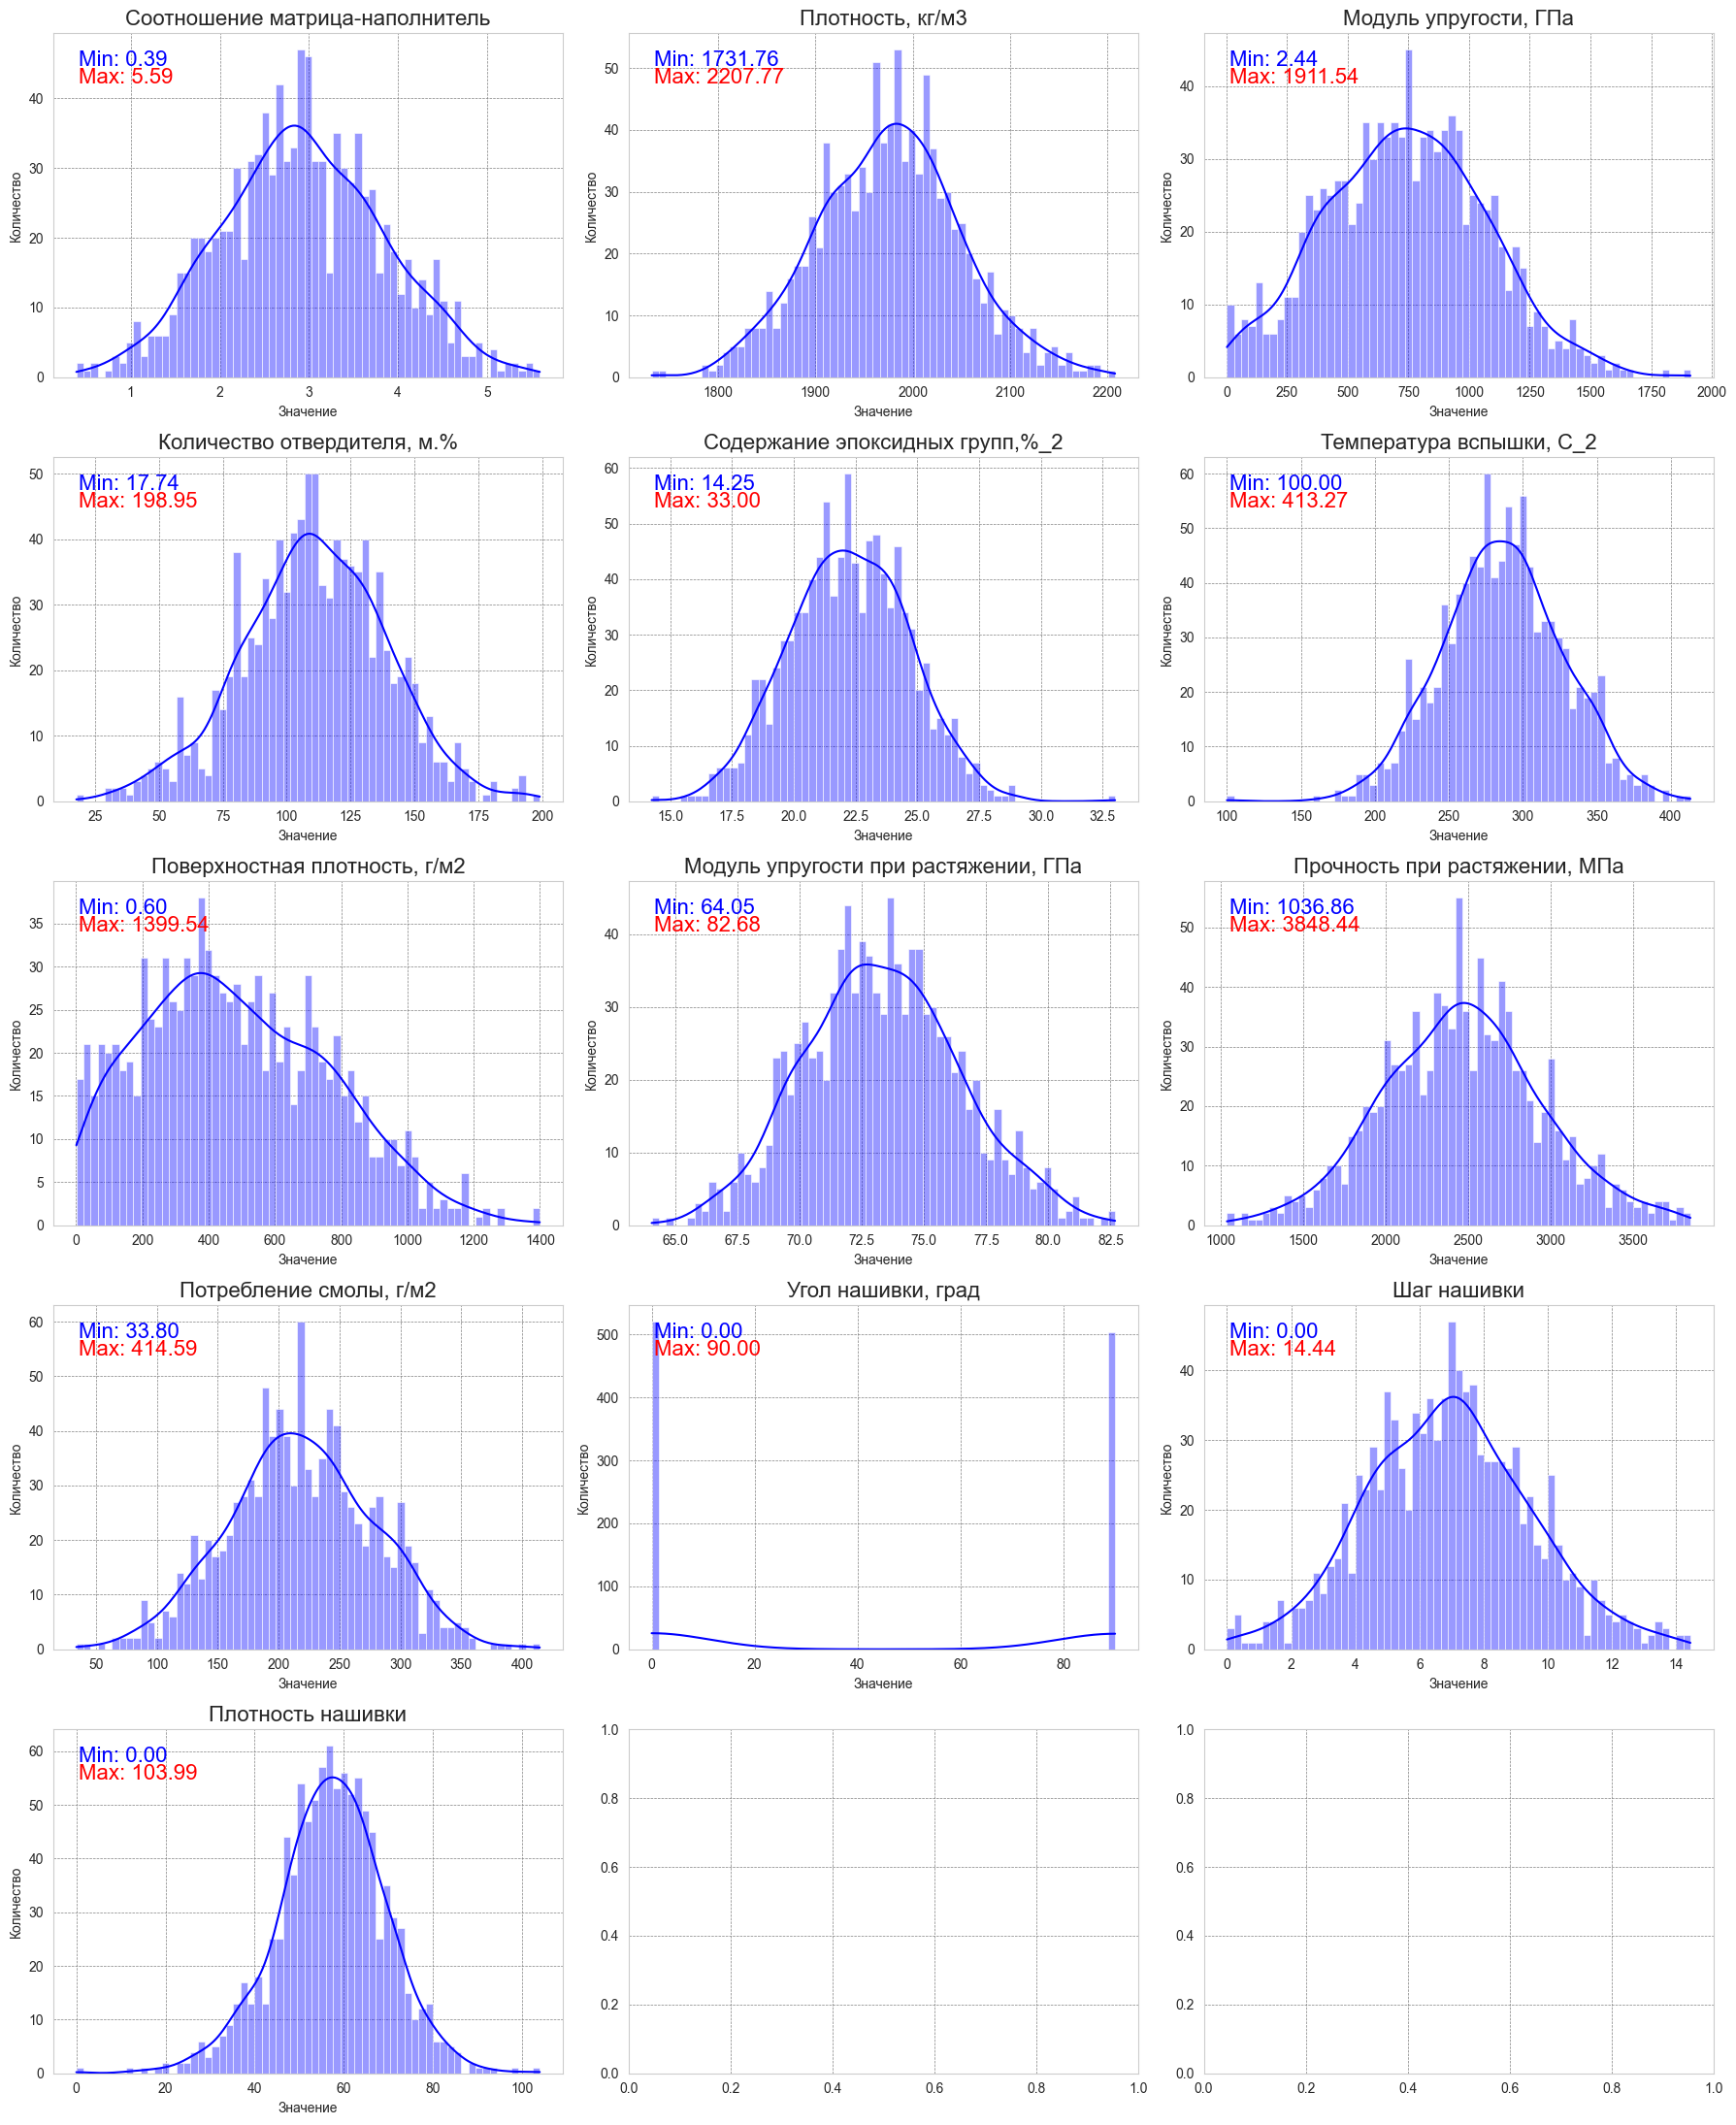

In [130]:
# Создание фигуры с подзаголовками
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(18,22))
i = 1
dict_min_max = {}
data = dataset_result
bins = 65
# Функция для построения гистограммы 
def plot_histogram(ax, column_index, column_name):
    column_name = data.columns[column_index]
    
    sns.histplot(data = data, x = data[data.columns[column_index]], ax = ax, kde = True,                                # kde - плотность
                color = 'blue', edgecolor = 'white', bins = bins, alpha = 0.4)                                            # alpha - полупрозрачная гистограмма
    
    max_data_val = max(data[column_name])                                                                               # Вычисляем максимальное значение в текущем датасете (колонке)
    min_data_val = min(data[column_name])
    dict_min_max[column_name] = (min_data_val, max_data_val)
    
    ax.text(0.05, 0.95, f'Min: {min_data_val:.2f}', transform = ax.transAxes, verticalalignment = 'top', color = 'blue', fontsize = 16)     # Увеличиваем размер шрифта для наглядности 
    ax.text(0.05, 0.90, f'Max: {max_data_val:.2f}', transform = ax.transAxes, verticalalignment = 'top', color = 'red', fontsize = 16)      # при сохранении в файл

    ax.set_title(column_name, fontsize = 16)
    ax.set_xlabel('Значение')
    ax.set_ylabel('Количество')


# Перебираем список названий столбцов
column_names = dataset_result.columns.tolist()

# Перебираем все оси и строим гистограммы
for i in range(5):                                              # строки
    for j in range(3):                                          # столбцы
        column_index = i * 3 + j                                # вычисляем индекс колонки
        if column_index < len(column_names):
            plot_histogram(axs[i, j], column_index, column_names[column_index])


# Настройка сетки
for ax in axs.flatten():
    ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')

plt.tight_layout()                                              # автоматическая настройка отступов
plt.savefig("hist_1.jpg", format = "jpeg")                        # Сохраним график в файл

plt.show()

Гистограммы показали явное наличие выбросов - изолированные значения вне основного распределения. Бимодальное распределение иллюстрирует гистограмма "Угол нашивки", которое говорит о двух классах. Остальные же иллюстрирую распределения, близкие к нормальному типу. Гистограмма "Поверхностная плотность" иллюстрирует распределение с обрывом слева. "Модуль упругости" имеет асимметрию > 0. Также все гистограммы имеют положительный эксцесс, поскольку остроконечны. Кривая плотности визуально упрощает оценку формы распределения данных и, как следствие, тип распределения. Ширина кривой плотности (kde, плавная кривая распределения данных) показывает разброс: чем больше, тем больше стандартное отклонение, чем уже - тем более плотно сгруппированы данные. Чем больше хвосты у кривой плотности, тем вероятнее присутствие выбросов, в случае узких хвостов - данные ограничены.

Итерация 2: (Дополнено после исследования выбросов по каждому столбцу, в конце данного раздела)
Делая вывод по гитограммам, следует исключить выбросы в следующих столбцах:
- Плотность: min - 1778.33, max - 2167.20, существенные выбросы - 1731.77, 1740.66, 2192.29, 2192.74, 2207.77 --> обрезаем по 1770.0 и 2190.0
- Модуль упругости:  min - 0, max - 1654.46, существенные выбросы - 1815.87 и 1911.54 --> обрезаем по - 1750.0
- Количество отвердителя: min - 36.51, max - 185.66, существенные выбросы - 17.74, 191.05, 192.33, 192.71, 192.85, 198.95 --> обрезаем по 25.0 и 191.0, соответственно
- Содержание эпоксидных групп: min - 15.58, max - 28.99, существенные выбросы - 14.26, 33.0 --> обрезаем по 15.0 и 30.0, соответственно
- Температура вспышки: min - 178.16, max - 393.91, существенные выбросы - 100.0, 160.26, 403.65, 413.27 --> обрезаем по 170.0 и 400.0, соответственно
- Поверхностная плотность: min - 0, max - 1332.84, существенные выбросы - 1391.03, 1399.54 --> обрезаем по 1340.84
- Потребление смолы: min - 62.85, max - 374.26, существенные выбросы - 33.80, 41.05, 402.16, 414.59 --> обрезаем по 50.0 и 400.0, соответственно
- Плотность нашивки: min - 27.08, max - 87.66, существенные выбросы - 0.0, 11.74, 15.42, 17.93, 19.25, 20.57, 98.20, 103.99 --> обрезаем по 21.0 и 93.0, соответственно
Угол нашивки, Соотношение матрица-наполнитель, Модуль упругости при растяжении, Прочность при растяжении, Шаг нашивки - не имеют, либо имеют незначительные выбросы относительно максимального и минимального значений, кривая плотности иллюстрирует плавное убывание в обе стороны, без длинных хвостов, а также без больших пропусков между значениями минимума/максимума и выбросами. Поэтому был сделан вывод - оставить данные значения, чтобы не удалять из dataset большой процент данных.

Было проведено 2 итерации подготовки данных. Первая - удалялись все найденные по boxplot выбросы, что не привело к хорошему результату - модель убучалась плохо, средняя ошибка более 1. Вторая - были удалены существенные выбросы, с таким расчетом, чтобы итоговое количество удаленных данных было не более 3%, поскольку при первой итерации было удалено 8,41% данных. Вторая итерация также не привела к хорошему результату, даже стало незначительно хуже.

Итерация 3: Были удалены данные, которые на глаз кажутся фальшивыми, а также выбросы. Итерация 3 была разбита еще на 2. В первом случае удалялась малая часть существенно отличающихся данных, во втором случае - наоборот. Значительное улучшение метрик качества показала Итерация 3.2. (Далее по тексту упоминается, как Итерация 3 или Итерация 3.2)

Теперь построим графики рассеяния точек.

Text(0.5, 1.02, 'Парные графики для числовых переменных')

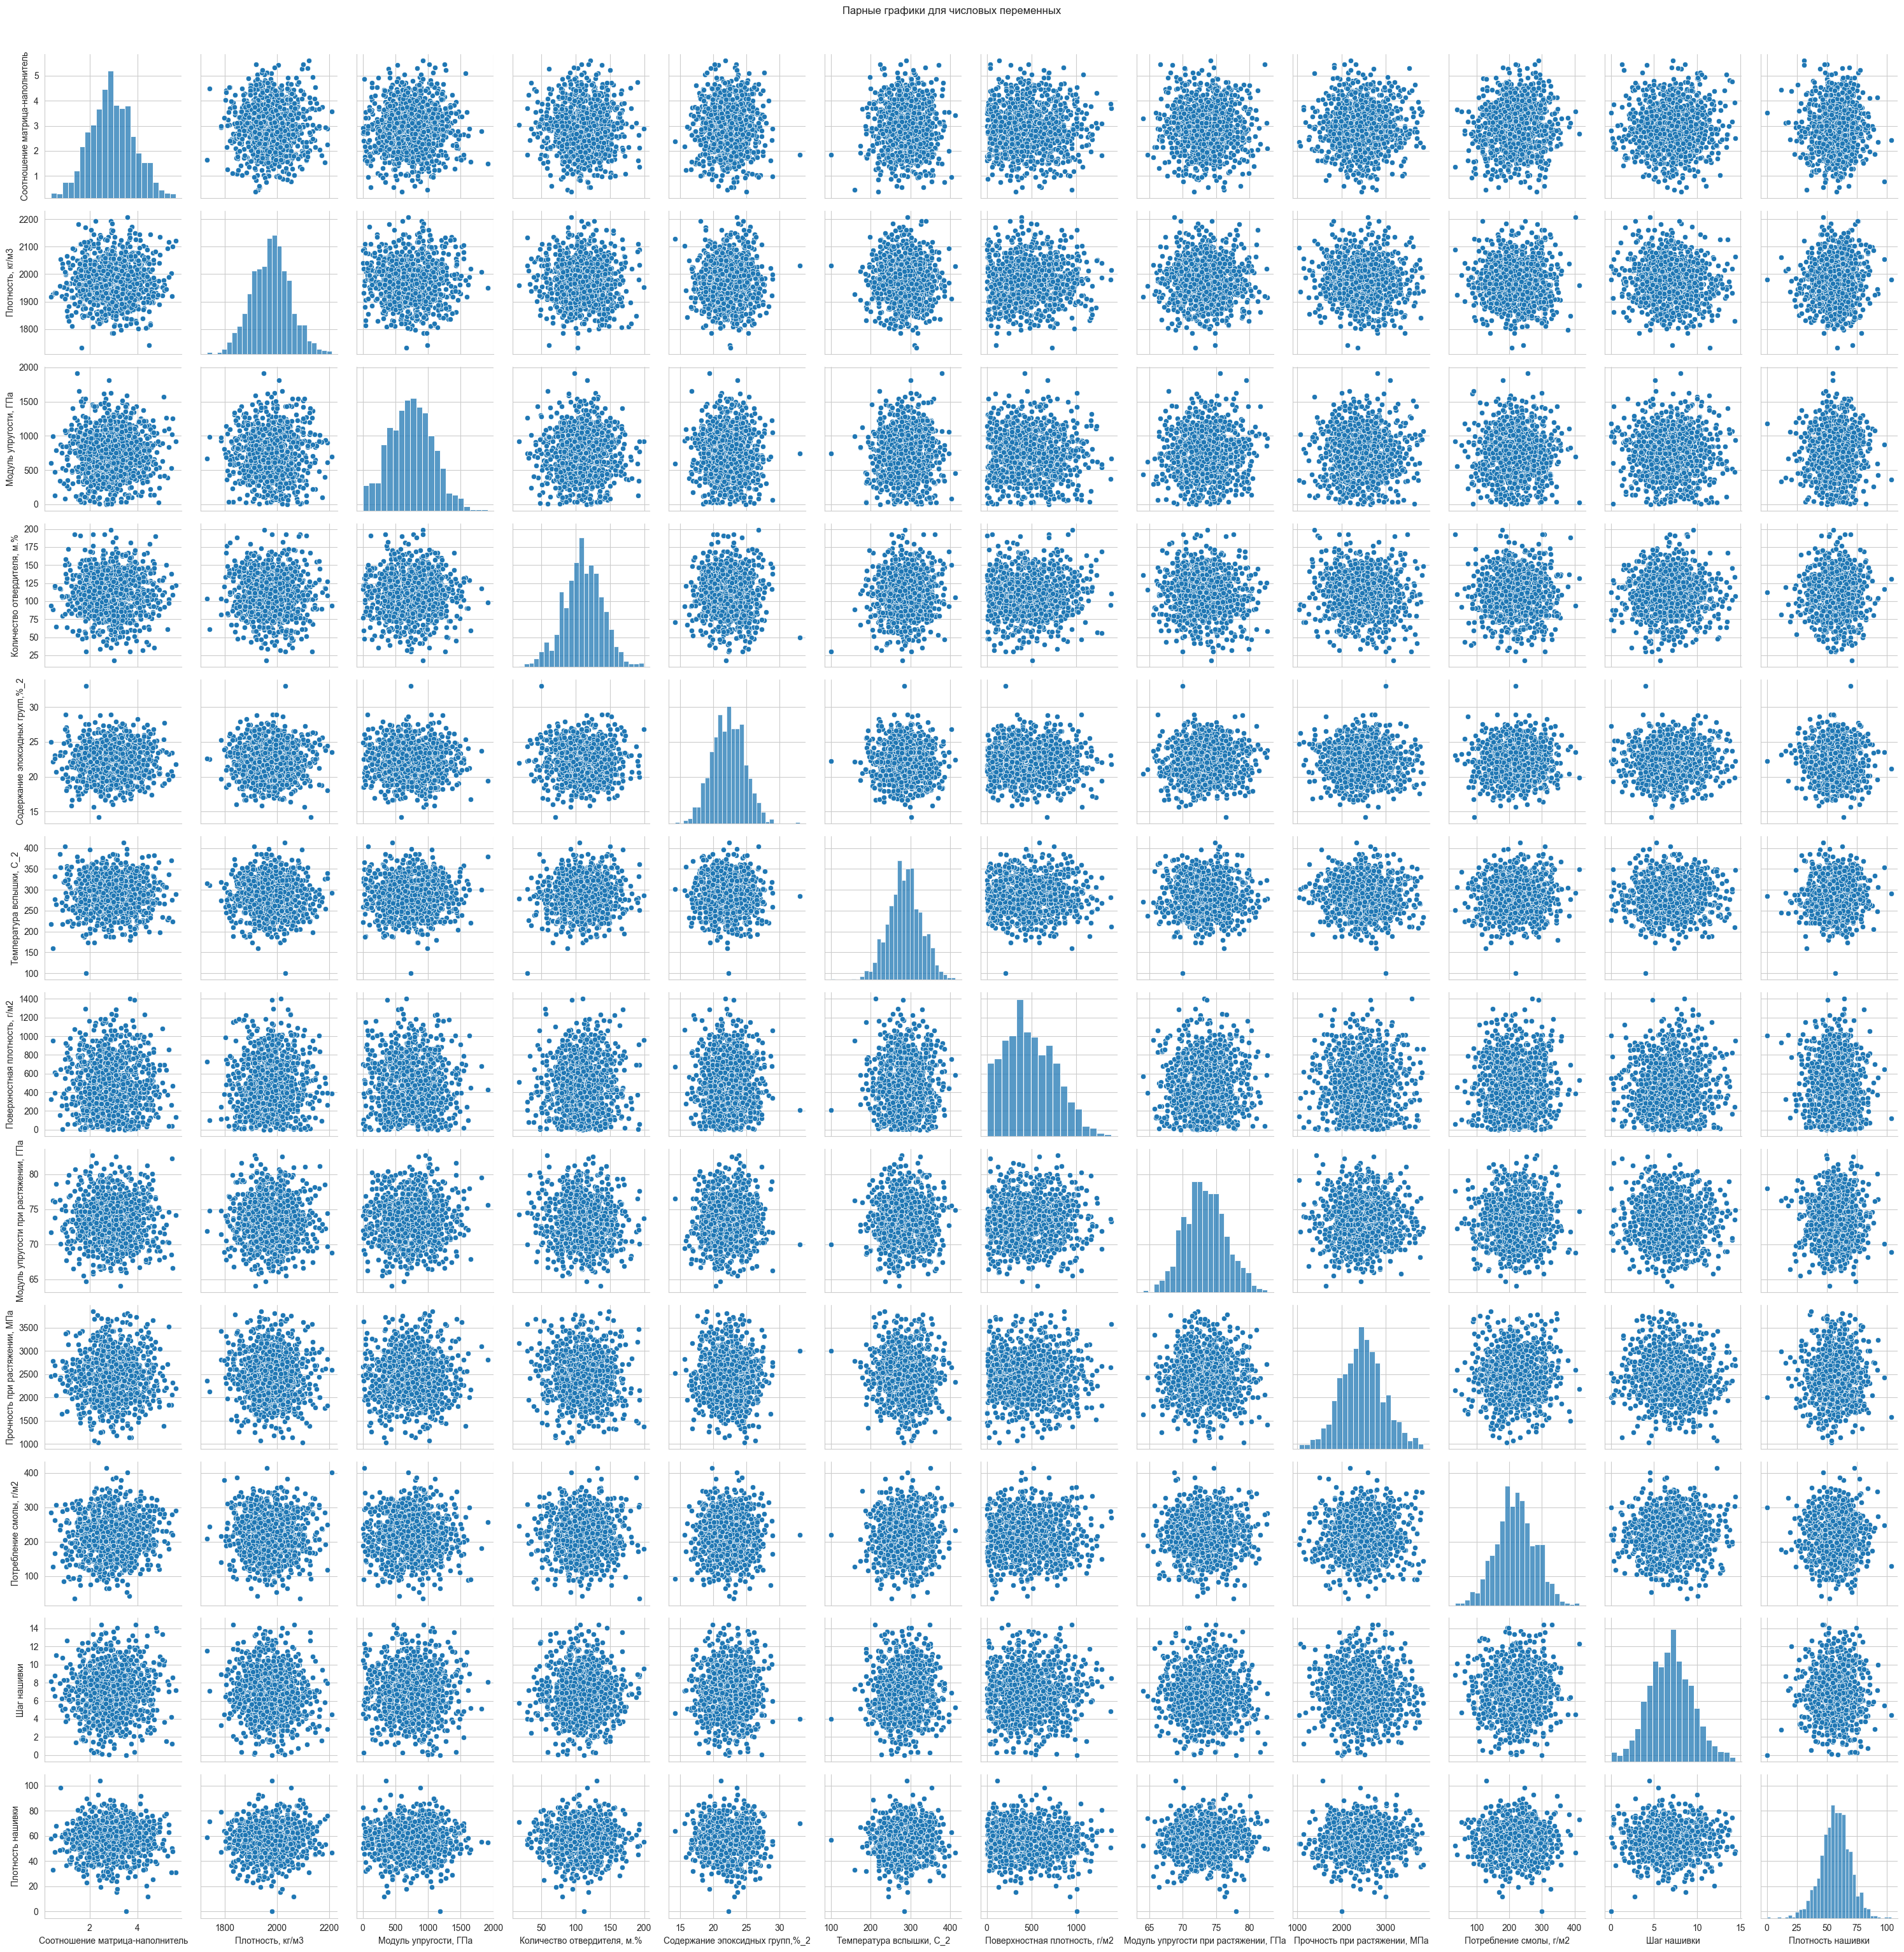

In [131]:
sns.pairplot(dataset_result, vars = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
                            'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                            'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'])
plt.tight_layout()
plt.suptitle('Парные графики для числовых переменных', y = 1.02)

Парные графики выведены таким образом для общей оценки dataset, не детальной. Хотя такой вариант вывода не приветствуется, но в данном случае можно оставить такой. Основной аргумент: Итерация 3.2 даст более информативные графики далее.

На данном этапе видно, что данные сконцентрированы в центральной части, что говорит об отсутствии явной линейной зависимости, однако, может указывать на наличие некоторой закономерности, например, кластеризации данных. Также имеются выбросы.

Отдельно следует изучить взаимосвязь между интересующими данными. На данном этапе было множество настроек в попытке найти корреляцию. 

d:\rebrikova_oo\envs\Env_Bauman_PRO_2\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RANSACRegressor was fitted with feature names
  warnings.warn(


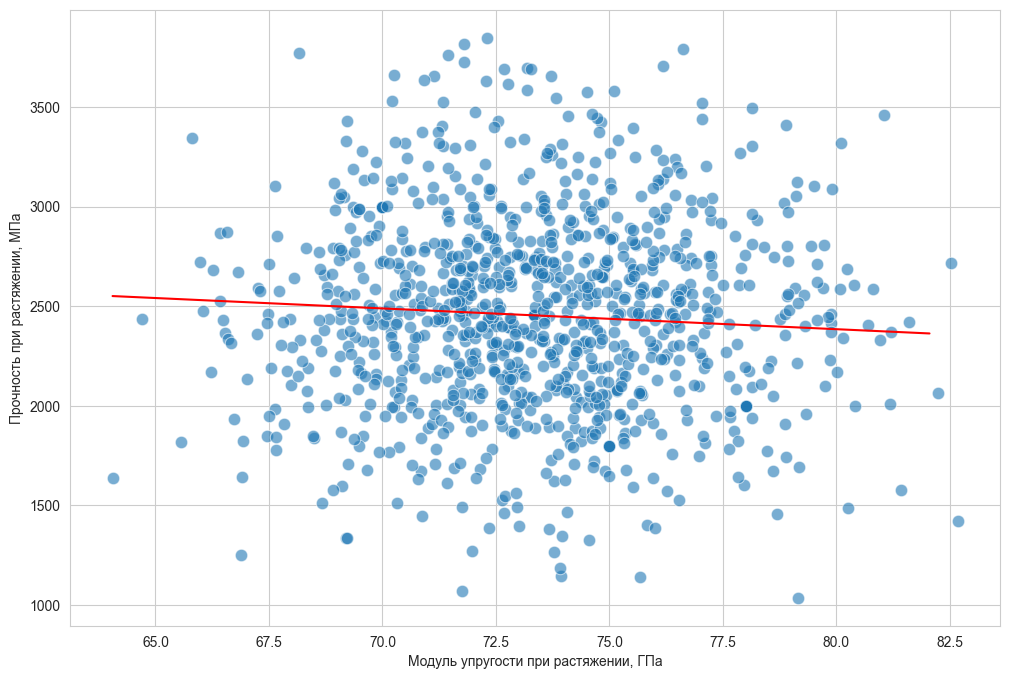

In [132]:
# Посмотрим взаимосвязь между интересующими данными
plt.figure(figsize=(12,8))
# sns.regplot(data=dataset_result, x = 'Модуль упругости при растяжении, ГПа', y = 'Прочность при растяжении, МПа', 
#             scatter_kws={'alpha':0.6, 's':80}, line_kws={'color': 'red'}, ci = 95, robust=True) --->> показывает диаграмму рассеяния с линией регрессии и доверительный интервал

sns.scatterplot(x = 'Модуль упругости при растяжении, ГПа', y = 'Прочность при растяжении, МПа', data=dataset_result, alpha = 0.6, s = 80)

ransac = RANSACRegressor(estimator=LinearRegression(), max_trials=100, min_samples=50, residual_threshold=5.0) # min число точек для построения модели, max число подбора попыток модели

X = dataset_result[['Модуль упругости при растяжении, ГПа']]
y = dataset_result[['Прочность при растяжении, МПа']]
ransac.fit(X,y)                                                                  # Строим робастую регрессию - минимизирует влияние выбросов - алгоритм RANSAC - красная линия

min_x = X.min().iloc[0]
min_y = X.max().iloc[0]

line_X = np.arange(min_x, min_y)[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
plt.plot(line_X, line_y_ransac, color = 'red', label = 'Регрессия')

plt.show()

По представленному графику видно, что между Плотностью при растяжении и Модулем упругости при растяжении не существует линейной зависимости. 
Рассматривается задача регрессии - взаимосвязь между двумя переменными, соответственно модели надо подбирать регрессионные. Линейная регрессия отсутствует.

Однако на Итерации 3.2 линейная зависимость все-таки была обнаружена!

Для наиболее явного обнаружения выбросов и их дальнейшего исключения из dataset, необходимо нарисовать "ящики с усами".

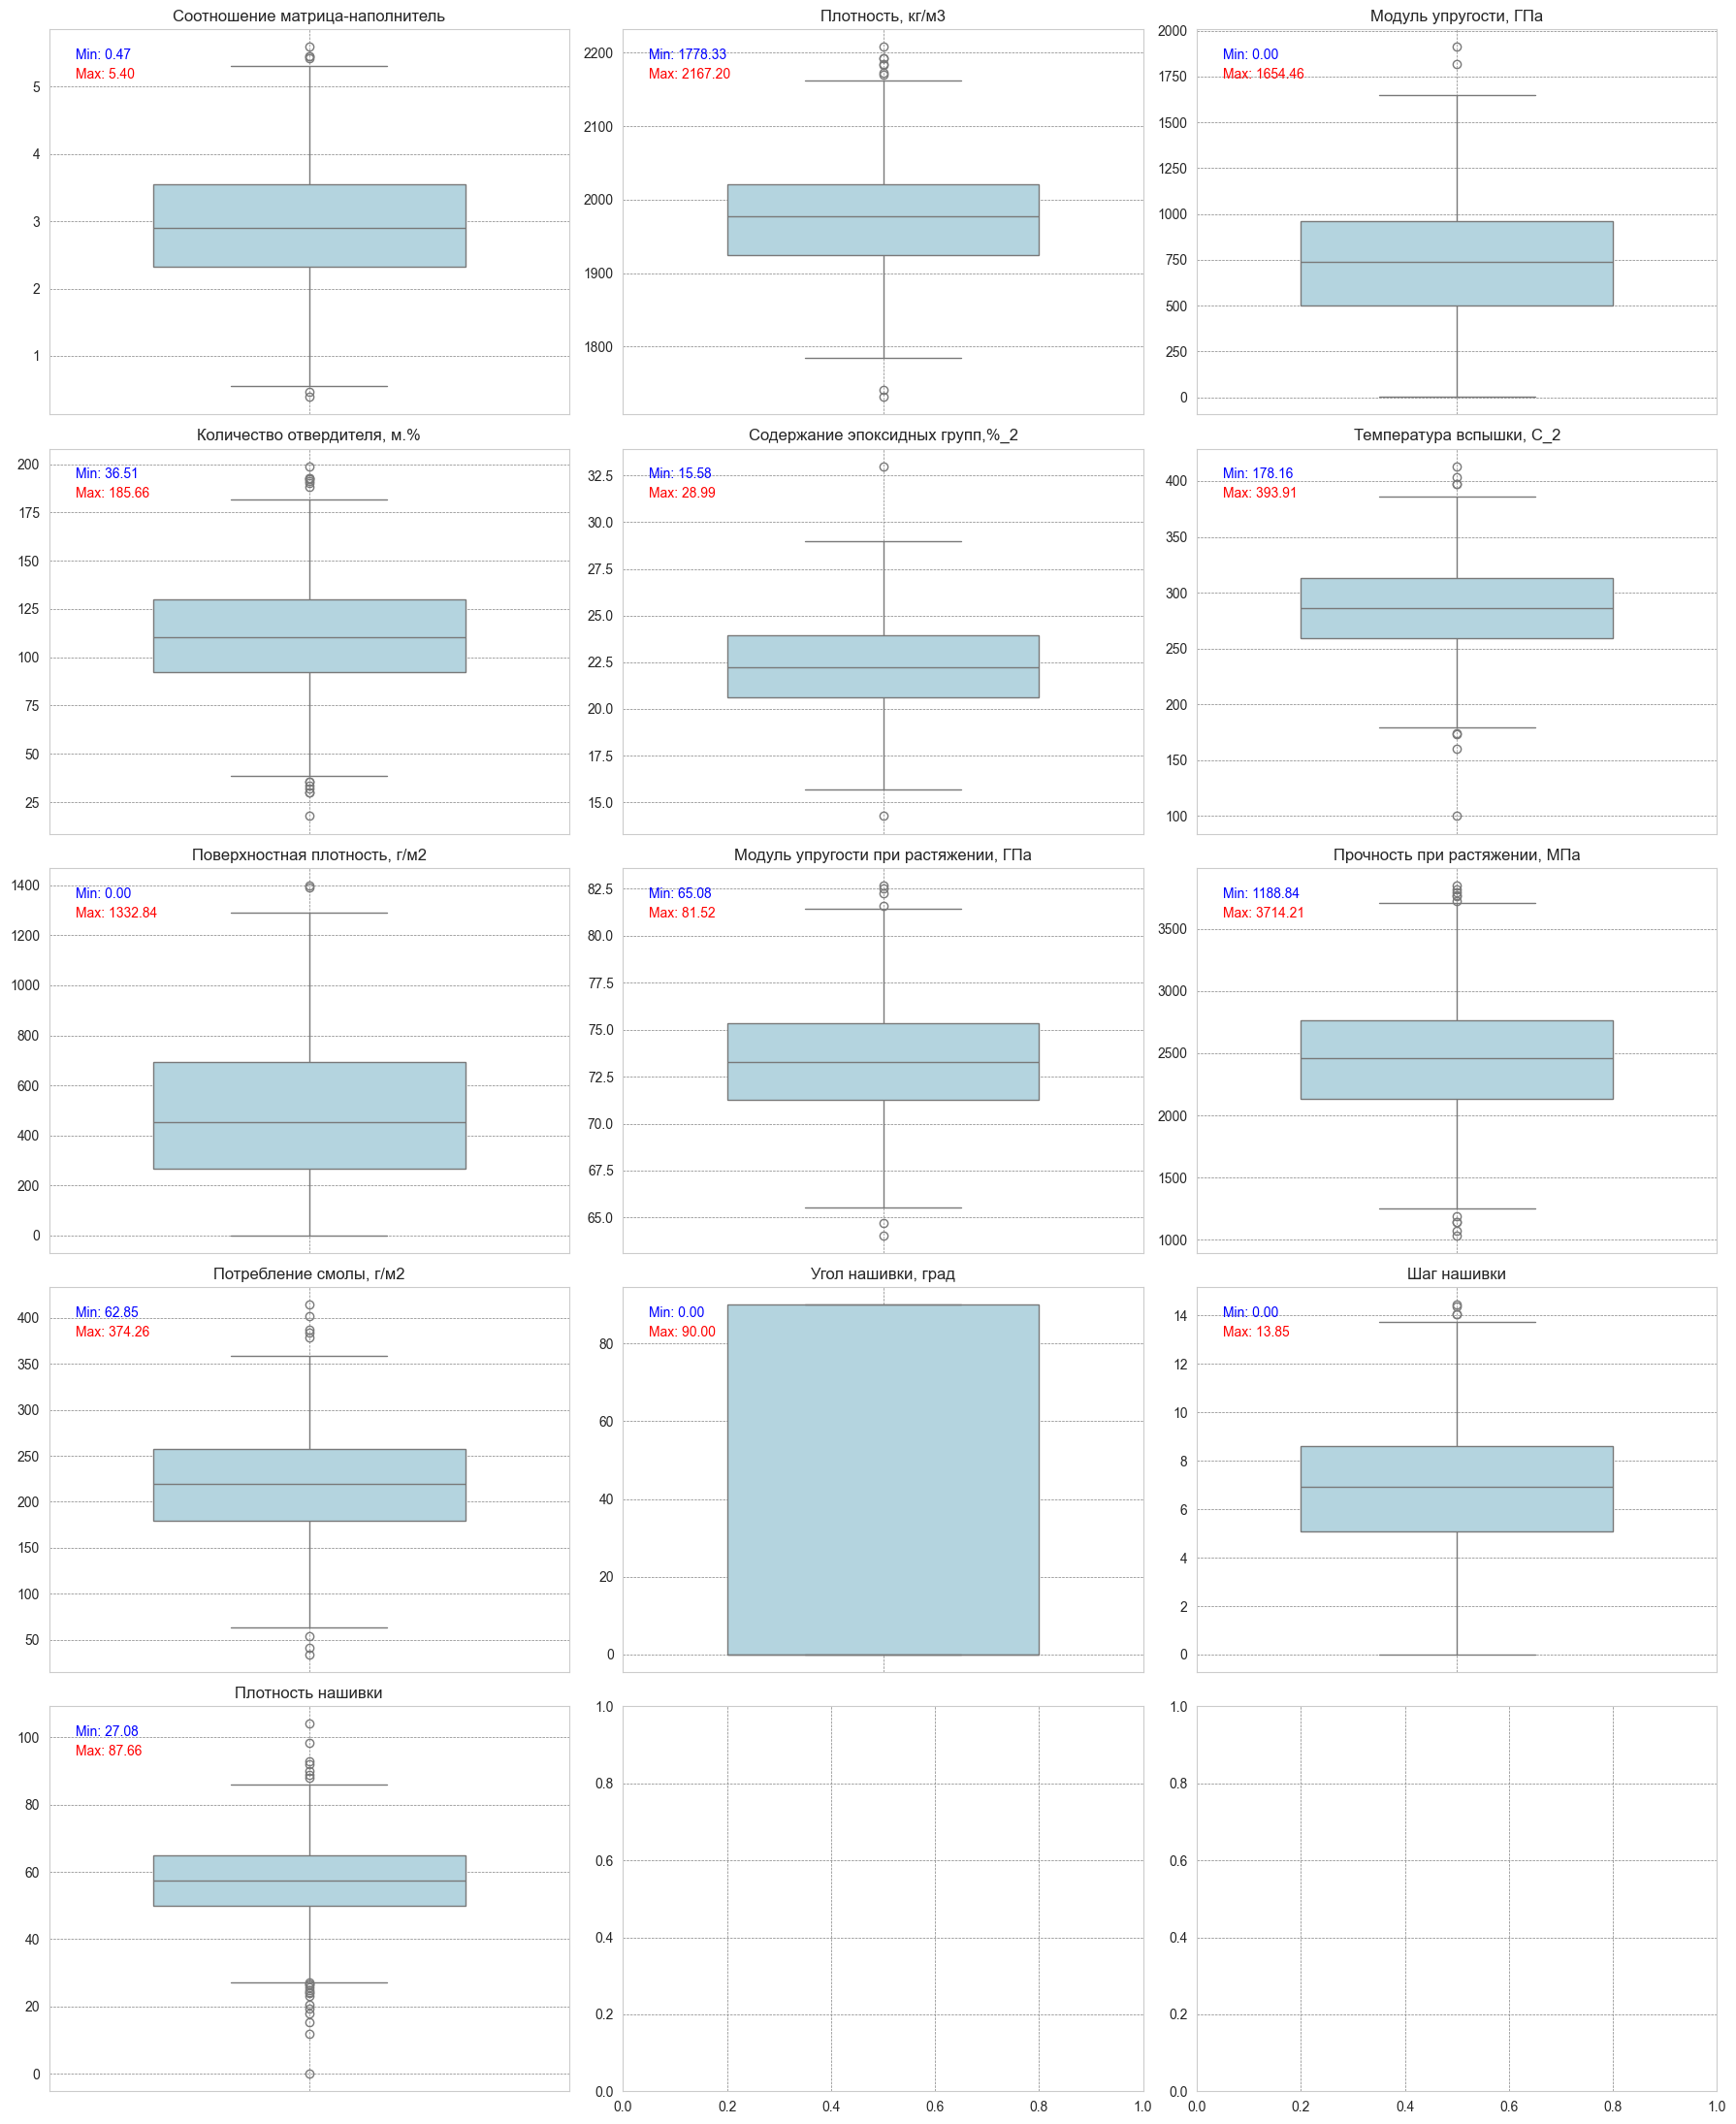

In [133]:
# Создание фигуры с подзаголовками
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(18,22))
dict_min_max = {}
data = dataset_result
# Функция для построения boxplot
def plot_boxplot(ax, column_index, name):
    column_name = data.columns[column_index]                      # Получаем название колонки

    sns.boxplot(y = data[column_name], ax = ax, color = 'lightblue', width = 0.6, showfliers = True)

    Q1 = data[column_name].quantile(0.25)                         # Получаем значение 1-го квартиля
    Q3 = data[column_name].quantile(0.75)                         # Получаем значение 3-го квартиля
    IQR = Q3 - Q1                                                           # Получаем значение межквартильного размаха
    min_val = Q1 - 1.5 * IQR                                                # Получаем минимальное значение (оно же 0-й квартиль)
    max_val = Q3 + 1.5 * IQR                                                # Получаем максимальное значение (оно же 4-й квартиль)

    max_dataset_val = max(data[column_name])                      # Вычисляем максимальное значение в текущем датасете (колонке)

    if min_val < 0: min_val = 0                                             # Проверка: если полученное минимальное значение меньше 0 (чего нет в dataset) установить 0
    if max_val > max_dataset_val: max_val = max_dataset_val                 # Проверка: если полученное максимальное значение больше максимального значения в datset - присвоить max знач-е

    # Создаем словарь с максимальными и минимальными значениями к каждой колонке
    dict_min_max[column_name] = (min_val, max_val)

    # Отрисовка минимального и максимального значений на каждом из графиков
    ax.text(0.05, 0.95, f'Min: {min_val:.2f}', transform = ax.transAxes, verticalalignment = 'top', color = 'blue')
    ax.text(0.05, 0.90, f'Max: {max_val:.2f}', transform = ax.transAxes, verticalalignment = 'top', color = 'red')

    ax.set_title(name)
    ax.set_ylabel('')
    ax.yaxis.grid(True, linestyle = '--', linewidth = 0.7)

# Перебираем все оси и строим boxplot
for i in range(5):                                                          # строки
    for j in range(3):                                                      # столбцы
        column_index = i * 3 + j                                            # вычисляем индекс колонки
        if column_index < len(column_names):
            plot_boxplot(axs[i, j], column_index, column_names[column_index])

for ax in axs.flatten():                                                    # Строим сетку для всех графиков
    ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')

plt.tight_layout()                                                          # автоматическая настройка отступов
plt.show()

In [134]:
print(dict_min_max)

{'Соотношение матрица-наполнитель': (np.float64(0.4657267644999994), np.float64(5.4048197765)), 'Плотность, кг/м3': (np.float64(1778.3271044999995), np.float64(2167.2027365000004)), 'Модуль упругости, ГПа': (0, np.float64(1654.4601386250001)), 'Количество отвердителя, м.%': (np.float64(36.513195075), np.float64(185.660668075)), 'Содержание эпоксидных групп,%_2': (np.float64(15.577185015000005), np.float64(28.992783014999993)), 'Температура вспышки, С_2': (np.float64(178.16316125), np.float64(393.90547205000007)), 'Поверхностная плотность, г/м2': (0, np.float64(1332.8375748499998)), 'Модуль упругости при растяжении, ГПа': (np.float64(65.07762786499998), np.float64(81.524002545)), 'Прочность при растяжении, МПа': (np.float64(1188.8364415000003), np.float64(3714.2071255)), 'Потребление смолы, г/м2': (np.float64(62.84621454999997), np.float64(374.26302975000004)), 'Угол нашивки, град': (0, 90.0), 'Шаг нашивки': (0, np.float64(13.84568253675)), 'Плотность нашивки': (np.float64(27.0805886824

По построенным "ящикам с усами" видно: 
- голубая область - 50% наблюдений;
- 25% квартиль - нижняя граница ящика;
- 75% квартиль - верхняя граница ящика;
- медиана - отрезок пересекающий примерно середину ящика;
- наибольшее и наименьшее значения, не являющиеся выбросами;
- выбросы - значения, отстоящие от края ящика на полторы его длины и более, которые можно отбросить.

Верно для Итерации 2: Вычислив максимальное и минимальное значения для каждой колонки, можно исключить выбросы, отстоящие от этих значений. Таким образом исключаем ненужные данные.

In [135]:
dataset_result.corr(numeric_only = True)                                        # Еще один наглядный вариант отслеживания корреляции между переменными

Соотношение матрица-наполнитель  \
Соотношение матрица-наполнитель                           1.000000000   
Плотность, кг/м3                                          0.003841357   
Модуль упругости, ГПа                                     0.031699500   
Количество отвердителя, м.%                              -0.006444748   
Содержание эпоксидных групп,%_2                           0.019765772   
Температура вспышки, С_2                                 -0.004776287   
Поверхностная плотность, г/м2                            -0.006271673   
Модуль упругости при растяжении, ГПа                     -0.008410569   
Прочность при растяжении, МПа                             0.024148141   
Потребление смолы, г/м2                                   0.072530857   
Угол нашивки, град                                       -0.031072858   
Шаг нашивки                                               0.036436893   
Плотность нашивки                                        -0.004651754   

                                      Плотность, кг/м3  Модуль упругости, ГПа  \
Соотношение матрица-наполнитель            0.003841357            0.031699500   
Плотность, кг/м3                           1.000000000           -0.009646929   
Модуль упругости, ГПа                     -0.009646929            1.000000000   
Количество отвердителя, м.%               -0.035911393            0.024049221   
Содержание эпоксидных групп,%_2           -0.008278404           -0.006804489   
Температура вспышки, С_2                  -0.020694945            0.031174313   
Поверхностная плотность, г/м2              0.044929597           -0.005305506   
Модуль упругости при растяжении, ГПа      -0.017601861            0.023267116   
Прочность при растяжении, МПа             -0.069981079            0.041867613   
Потребление смолы, г/м2                   -0.015936555            0.001839612   
Угол нашивки, град                        -0.068474484           -0.025416996   
Шаг нашивки                               -0.061015267           -0.009874586   
Плотность нашивки                          0.080303999            0.056345797   

                                      Количество отвердителя, м.%  \
Соотношение матрица-наполнитель                      -0.006444748   
Плотность, кг/м3                                     -0.035911393   
Модуль упругости, ГПа                                 0.024049221   
Количество отвердителя, м.%                           1.000000000   
Содержание эпоксидных групп,%_2                      -0.000683668   
Температура вспышки, С_2                              0.095192504   
Поверхностная плотность, г/м2                         0.055197923   
Модуль упругости при растяжении, ГПа                 -0.065928640   
Прочность при растяжении, МПа                        -0.075374936   
Потребление смолы, г/м2                               0.007445728   
Угол нашивки, град                                    0.038570377   
Шаг нашивки                                           0.014887431   
Плотность нашивки                                     0.017247727   

                                      Содержание эпоксидных групп,%_2  \
Соотношение матрица-наполнитель                           0.019765772   
Плотность, кг/м3                                         -0.008278404   
Модуль упругости, ГПа                                    -0.006804489   
Количество отвердителя, м.%                              -0.000683668   
Содержание эпоксидных групп,%_2                           1.000000000   
Температура вспышки, С_2                                 -0.009769399   
Поверхностная плотность, г/м2                            -0.012939654   
Модуль упругости при растяжении, ГПа                      0.056828336   
Прочность при растяжении, МПа                            -0.023898655   
Потребление смолы, г/м2                                   0.015164676   
Угол нашивки, град                                        0.008052272   
Шаг нашивки                          

Следующим этапом будет очистка dataset от выбросов и его нормализация. Для начала необходимо отбросить выбросы для двух переменных, у которых их количество наибольшее, а также проверить, как это повлияет на общую картину.

Удаление выбросов и создание нового dataset, а затем построение тепловой карты, чтобы оценить влияние выбросов на общую картину.

In [136]:
# Данный кусок кода был написан для Итерации 2, из всех выбросов по столбцу вручную выбирались наиболее явные, для их последующего удаления и сокращения общего объема удаляемых данных

# Выявляем выбросы
# cleared_list = datset_result_after_drop_ax0['Плотность нашивки']           # Создаем список,содержащий данные из одной конкретной колонки
# i = j = 0                                                           # Создаем счетчики для подсчета количества выбросов

# # Удаление выбросов по наименьшему и наибольшему значениям в каждом столбце
# # cleared_list = [number for number in cleared_list if (number > dict_min_max['Прочность при растяжении, МПа'][0]) and (number < dict_min_max['Прочность при растяжении, МПа'][1])]

# for number in cleared_list:
#     if number < dict_min_max['Плотность нашивки'][0]: 
#         i += 1
#         print(number)
# print(i)
# print()
# for number in cleared_list:
#     if number > dict_min_max['Плотность нашивки'][1]: 
#         j += 1
#         print(number)
# print(j)

# # sns.boxplot(y = cleared_list, color = 'lightblue', width = 0.6, showfliers = True)
# # plt.yticks(range(1200, 3700, 300))

### Data preparation - осуществляем базовые преобразования датасета

Итерация 3: Дополнительно удаляются строки в таблице. После соединения двух таблиц было обнаружено явное отличие записей с id от 0 до 39 от всего остального dataset.

In [137]:
# # Удаление строк от 0 до 39
# drop_index = range(40)                                     # Отдельно создадим диапазон индексов строк, которые надо удалить (от 0 до 39)
# datset_result_after_drop_ax0 = dataset_result.drop(drop_index, axis = 0)

# datset_result_after_drop_ax0

# # Можно сохранить в новый csv файл на всякий случай
# datset_result_after_drop_ax0.to_csv('d1xd2_drop_ax0.csv', float_format= lambda x: f"{x:.9f}")

In [138]:
# Оставляем строки от 0 до 39
drop_index = range(40, len(dataset_result))                  # Отдельно создадим диапазон индексов строк, которые надо удалить (от 0 до 39)
dataset_result_after_drop_ax0_40 = dataset_result.drop(drop_index, axis = 0)


# Можно сохранить в новый csv файл на всякий случай
dataset_result_after_drop_ax0_40.to_csv('d1xd2_drop_ax0_40.csv', float_format= lambda x: f"{x:.9f}")

Верно для Итерации 2: Проанализировав выбросы, а также, посчитав общее количество строк, которые пришлось бы удалить из-за наличия выбросов в одной из ячеек этой строки (8,41%) сделан вывод, что удаление такого большого количества данных не принесет пользы. Поэтому по гистограммам, построенным выше, определены наиболее ярко выраженные выбросы, которые удлинняют хвосты сглаживающей кривой - плотности и "обрезаются" эти хвосты.
Снова создадим словарь с максимальными и минимальнми значениями, по которым обрезаются хвосты.

In [139]:
# Данный кусок кода был написан для итерации 2, из всех выбросов по столбцу вручную выбирались наиболее явные, для их последующего удаления и сокращения общего объема удаляемых данных

# Границы для каждого столбца - выбранные максимальные и минимальные значения. Соберем их в словарь.
# dict_min_max_new = {
#     'Плотность, кг/м3': (1770.0, 2190.0),
#     'Модуль упругости, ГПа': (0, 1750.0),
#     'Количество отвердителя, м.%': (25.0, 191.0),
#     'Содержание эпоксидных групп,%_2': (15.0, 30.0),
#     'Температура вспышки, С_2': (170.0, 400.0),
#     'Поверхностная плотность, г/м2': (0, 1340.84),
#     'Потребление смолы, г/м2': (50.0, 400.0),
#     'Плотность нашивки': (21.0, 93.0)
# }
# # Создаем список для хранения условий
# conditions = []
# # Проходим по всем столбцам из словаря, объединяем условия для фильтрации, фильтруем датасет
# for column, (min_val, max_val) in dict_min_max_new.items():
#     conditions.append((dataset_result[column] >= min_val) & (dataset_result[column] <= max_val))
# if conditions:
#     dataset_result_filtered = dataset_result.loc[reduce(lambda x, y: x & y, conditions)]
    
# dataset_result_filtered.to_csv('d1xd2_filtered.csv', index = True, encoding = 'utf-8')
# print(f"Сохранено {len(dataset_result_filtered)} строки после фильтрации")


Псоле удаления фальшивых на мой взгляд данных, оставляются 40 строк, удаляются выбросы.

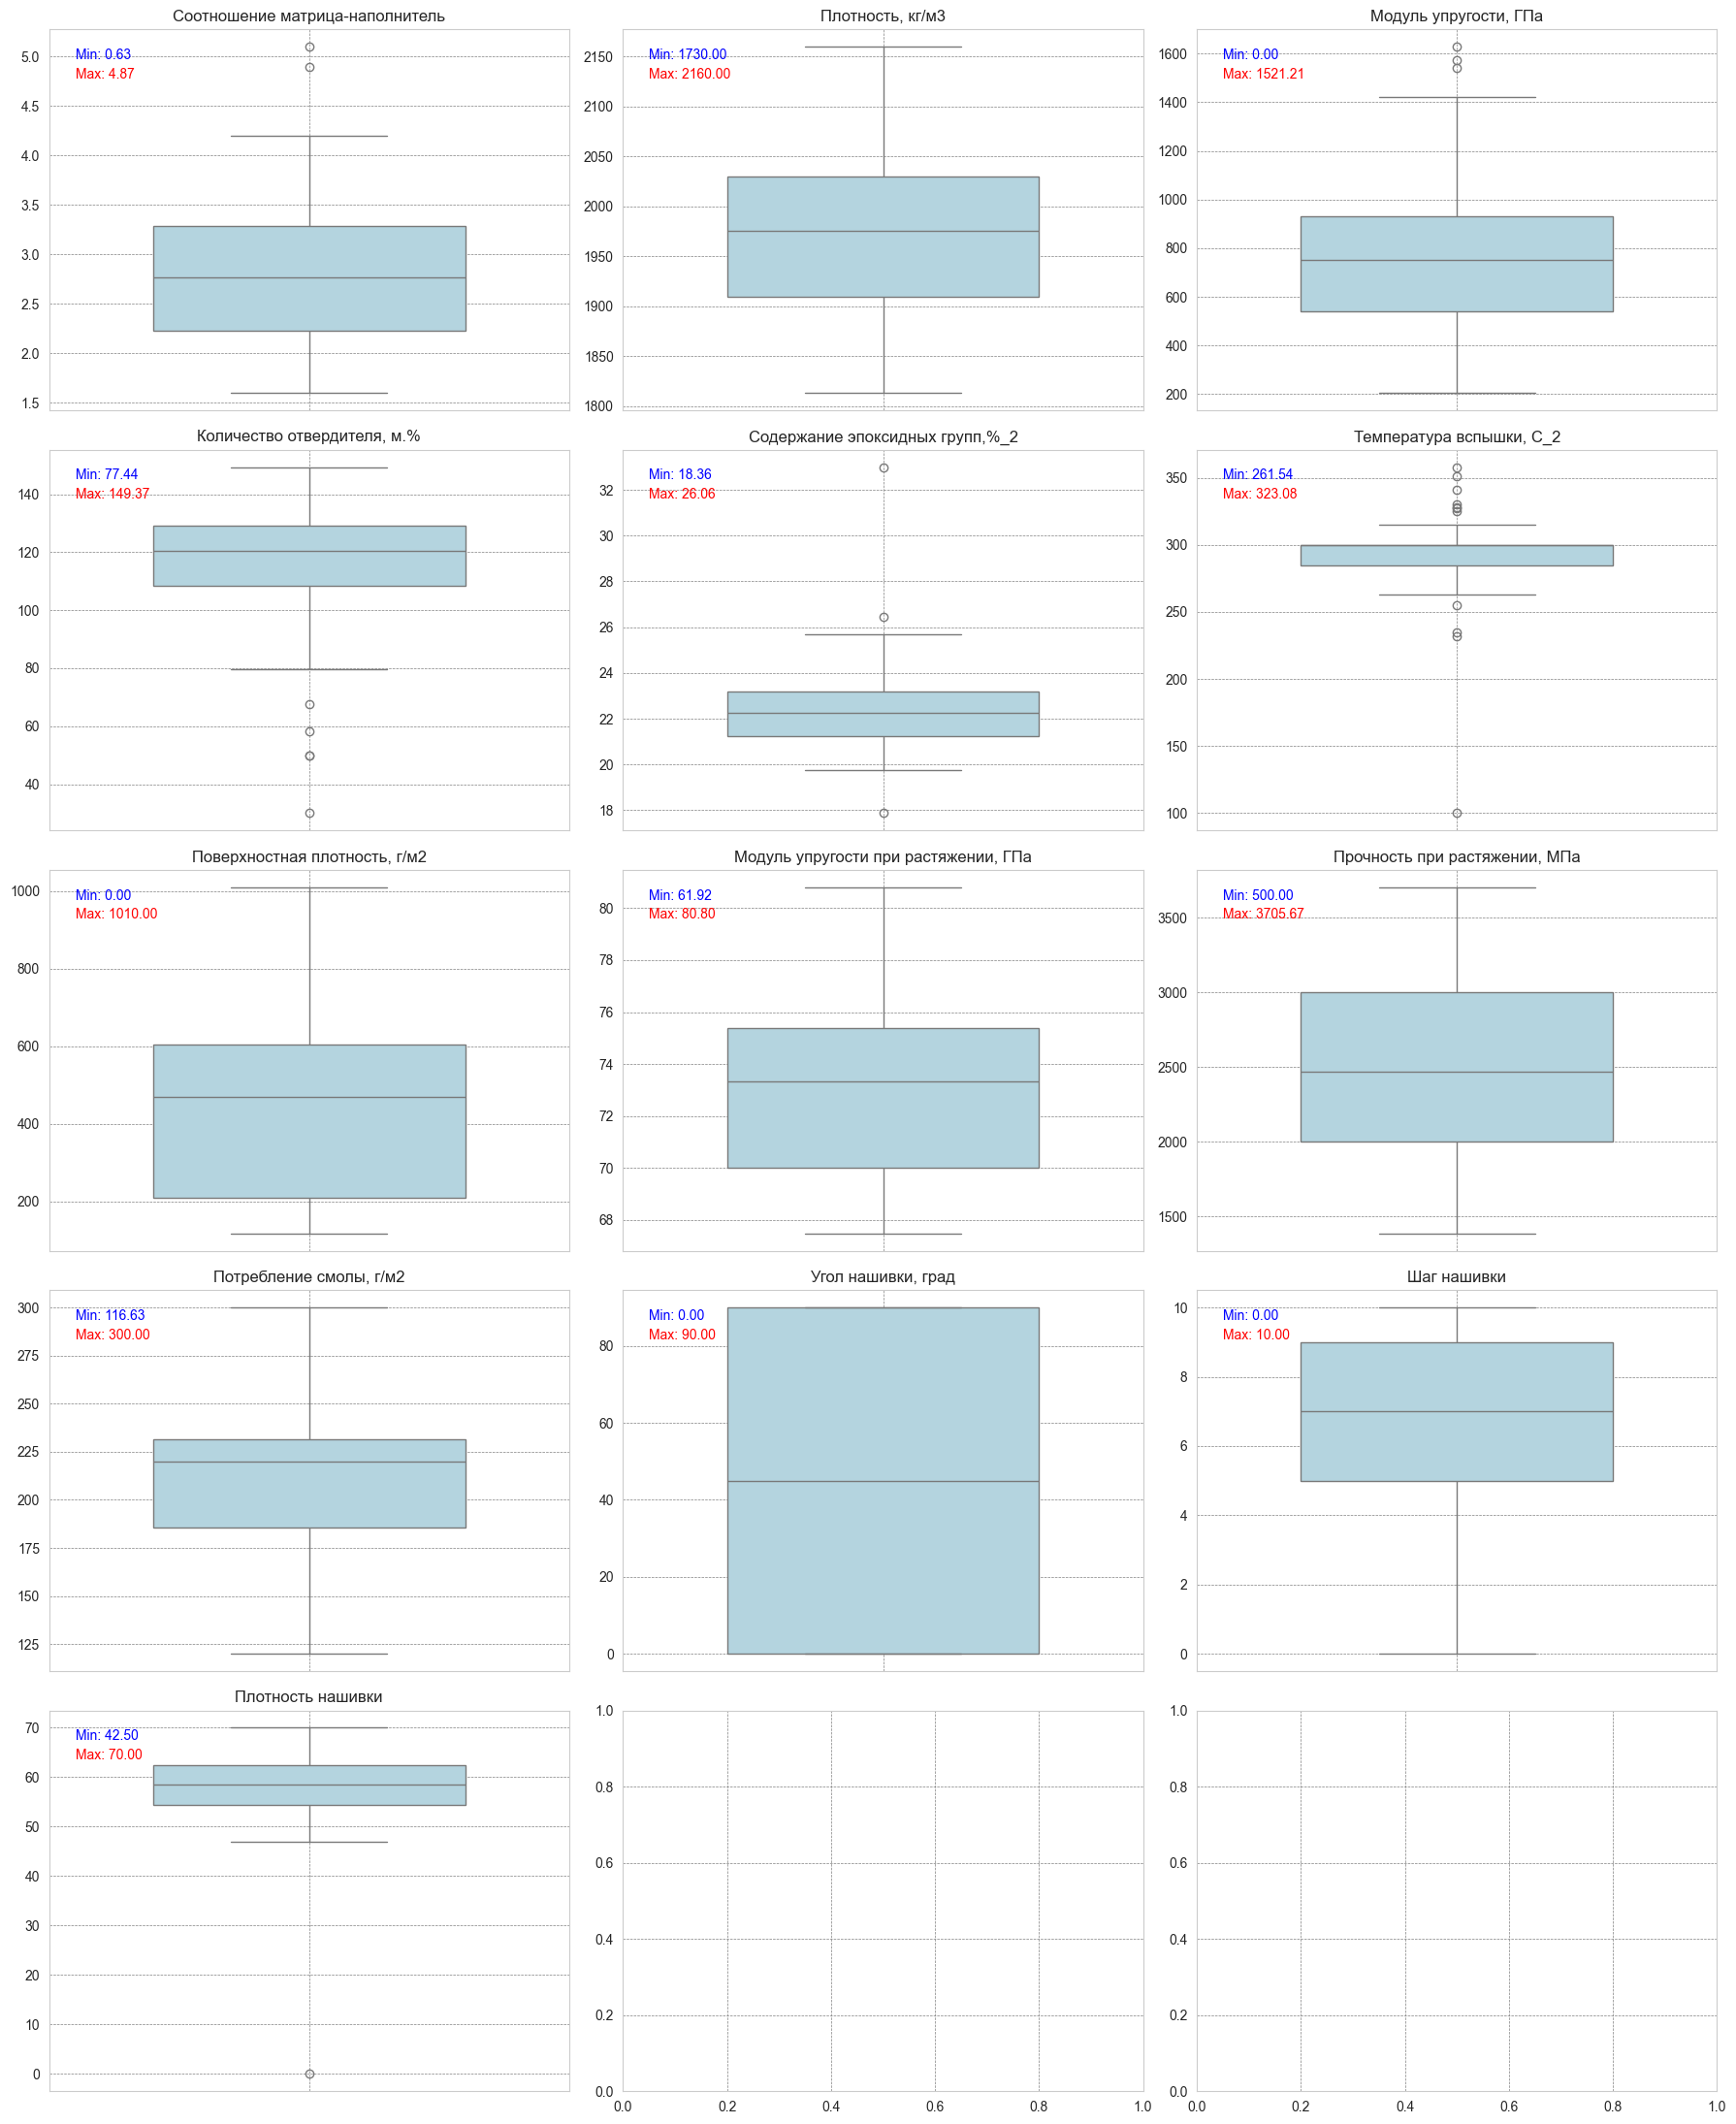

In [140]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(18,22))
dict_min_max = {}
data = dataset_result_after_drop_ax0_40
# Перебираем все оси и строим boxplot
for i in range(5):                                                          # строки
    for j in range(3):                                                      # столбцы
        column_index = i * 3 + j                                            # вычисляем индекс колонки
        if column_index < len(column_names):
            plot_boxplot(axs[i, j], column_index, column_names[column_index])

for ax in axs.flatten():                                                    # Строим сетку для всех графиков
    ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')

plt.tight_layout()                                                          # автоматическая настройка отступов
plt.show()

In [141]:
dict_min_max

{'Соотношение матрица-наполнитель': (np.float64(0.633043485125),
  np.float64(4.8748924621250005)),
 'Плотность, кг/м3': (np.float64(1730.0), 2160.0),
 'Модуль упругости, ГПа': (0, np.float64(1521.2074426875001)),
 'Количество отвердителя, м.%': (np.float64(77.4409506875), 149.3728324),
 'Содержание эпоксидных групп,%_2': (np.float64(18.361384375),
  np.float64(26.064359374999995)),
 'Температура вспышки, С_2': (np.float64(261.53846150000004),
  np.float64(323.07692309999993)),
 'Поверхностная плотность, г/м2': (0, 1010.0),
 'Модуль упругости при растяжении, ГПа': (np.float64(61.9236035425),
  80.80322176),
 'Прочность при растяжении, МПа': (np.float64(500.0), 3705.672523),
 'Потребление смолы, г/м2': (np.float64(116.63364711250004), 300.0),
 'Угол нашивки, град': (0, 90.0),
 'Шаг нашивки': (0, 10.0),
 'Плотность нашивки': (np.float64(42.5), 70.0)}

In [142]:
def blowout_filter (dataset_result_after_drop_ax0_40, dict_min_max):
    maska = pd.Series([True] * len(dataset_result_after_drop_ax0_40))                        # Создается маска, чтобы включить все строки в выборку
    for column_name, (min_val, max_val) in dict_min_max.items():
        maska = maska & (dataset_result_after_drop_ax0_40[column_name] >= min_val) & (dataset_result_after_drop_ax0_40[column_name] <= max_val)
    return dataset_result_after_drop_ax0_40[maska]

dataset_result_filtered = blowout_filter(dataset_result_after_drop_ax0_40, dict_min_max)     # Отфильтрованный dataset  
dataset_result_filtered.to_csv('d1xd2_filtered_for_RS.csv', float_format= lambda x: f"{x:.9f}")                 # На всякий случай сохраняем результат в .csv файл

dataset_result_filtered                         

Соотношение матрица-наполнитель  Плотность, кг/м3  Модуль упругости, ГПа  \
id                                                                             
3                       1.857142857    2030.000000000          738.736842100   
4                       2.771331058    2030.000000000          753.000000000   
5                       2.767918089    2000.000000000          748.000000000   
6                       2.569620253    1910.000000000          807.000000000   
7                       2.561475410    1900.000000000          535.000000000   
8                       3.557017544    1930.000000000          889.000000000   
9                       3.532338308    2100.000000000         1421.000000000   
10                      2.919677836    2160.000000000          933.000000000   
12                      1.598173516    1950.000000000          827.000000000   
13                      2.919677836    1980.000000000          568.000000000   
14                      4.029126214    1910.000000000          800.000000000   
15                      2.934782609    2030.000000000          302.000000000   
16                      3.557017544    1880.000000000          313.000000000   
17                      4.193548387    1950.000000000          506.000000000   
20                      2.877358491    2000.000000000          205.000000000   
21                      1.598173516    1920.000000000          456.000000000   
22                      4.029126214    1880.000000000          622.000000000   
25                      2.046471464    2037.631811000          707.570887000   
28                      2.709554095    1892.071124000          641.052549400   
33                      2.984362226    1912.315437000         1183.091845000   
34                      2.916149621    1879.969846000         1003.270178000   
35                      3.247617211    1813.234600000          757.874479000   
38                      2.444176986    2085.495837000          931.310636100   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
id                                                                 
3                 129.000000000                     21.250000000   
4                 111.860000000                     22.267857140   
5                 111.860000000                     22.267857140   
6                 111.860000000                     22.267857140   
7                 111.860000000                     22.267857140   
8                 129.000000000                     21.250000000   
9                 129.000000000                     21.250000000   
10                129.000000000                     21.250000000   
12                129.000000000                     21.250000000   
13                129.000000000                     21.250000000   
14                129.000000000                     21.250000000   
15                129.000000000                     21.250000000   
16                129.000000000                     21.250000000   
17                129.000000000                     21.250000000   
20                111.860000000                     22.267857140   
21                111.860000000                     22.267857140   
22                111.860000000                     22.267857140   
25                101.617251300                     23.146392810   
28                 96.563293190                     22.989290560   
33                133.549000700                     23.263796570   
34                109.239530500                     25.682759480   
35                 81.379870840                     23.422465240   
38                110.564839900                     23.487139760   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
id                                                            
3              300.000000000                  210.000000000   
4              284.615384600                  210.000000000   
5              284.615384600                  210.

Необходимо построить диаграммы распределения переменных для нового dataset, до нормализации и стандартизации.

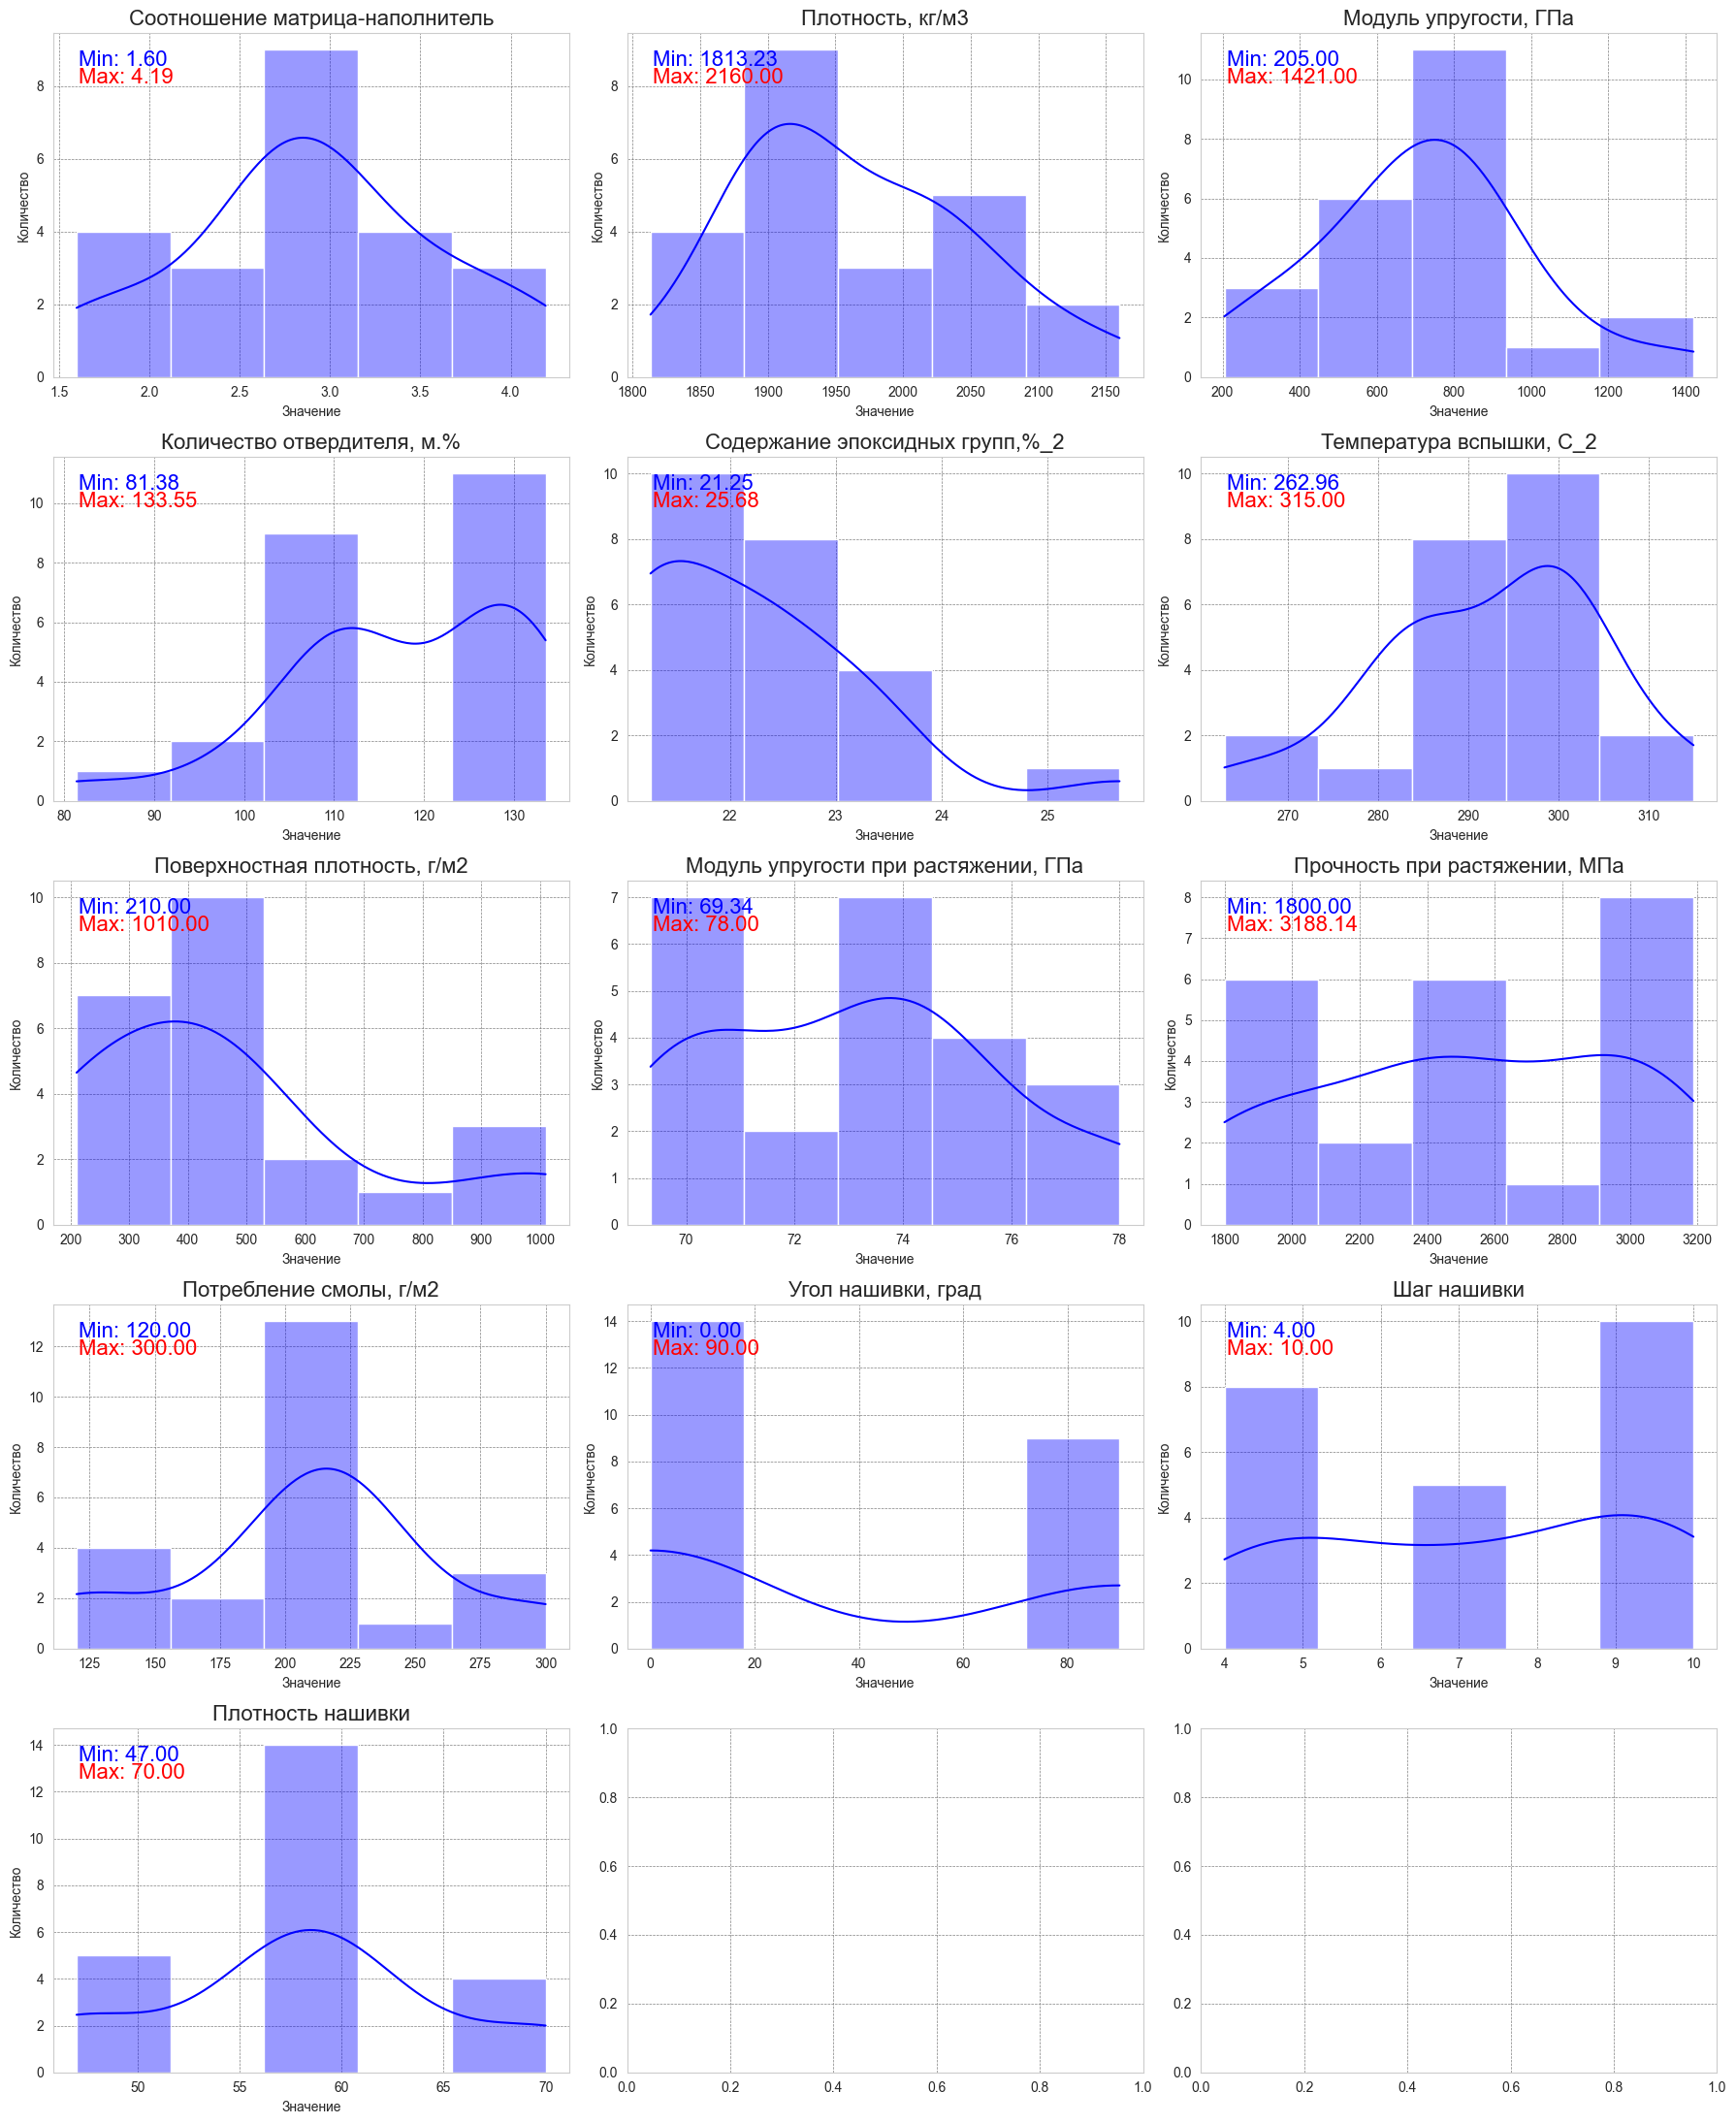

In [143]:
# Создание фигуры с подзаголовками
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(18,22))
i = 1
dict_min_max = {}
bins = 5
data = dataset_result_filtered
# Перебираем список названий столбцов
column_names = dataset_result_filtered.columns.tolist()

# Перебираем все оси и строим гистограммы
for i in range(5):                      # строки
    for j in range(3):                  # столбцы
        column_index = i * 3 + j        # вычисляем индекс колонки
        if column_index < len(column_names):
            plot_histogram(axs[i, j], column_index, column_names[column_index])


# Настройка сетки
for ax in axs.flatten():
    ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')

plt.tight_layout()                                              # автоматическая настройка отступов
plt.savefig("hist_2.jpg", format = "jpeg")                        # Сохраним график в файл

plt.show()

После преобразований набор данных был сильно уменьшен, что, без-условно, повлияет на качество обучения, также данных слишком мало для описания вида распределения, однако тенденцию все же можно заметить: не-которые распределения стремятся к нормальному, о чем говорит слабая симметрия относительно центрального значения. Распределения «Содержа-ние эпоксидных групп», «Поверхностная плотность» имеют положительную асимметрию, а «Количество отвердителя», наоборот, отрицательную с двумя пиками. Распределения «Прочность при растяжении» и «Шаг нашивки» с ярко выраженным плато, а «Угол нашивки» по-прежнему бимодален.

Теперь необходимо построить графики рассеяния точек.

Text(0.5, 1.02, 'Парные графики для числовых переменных')

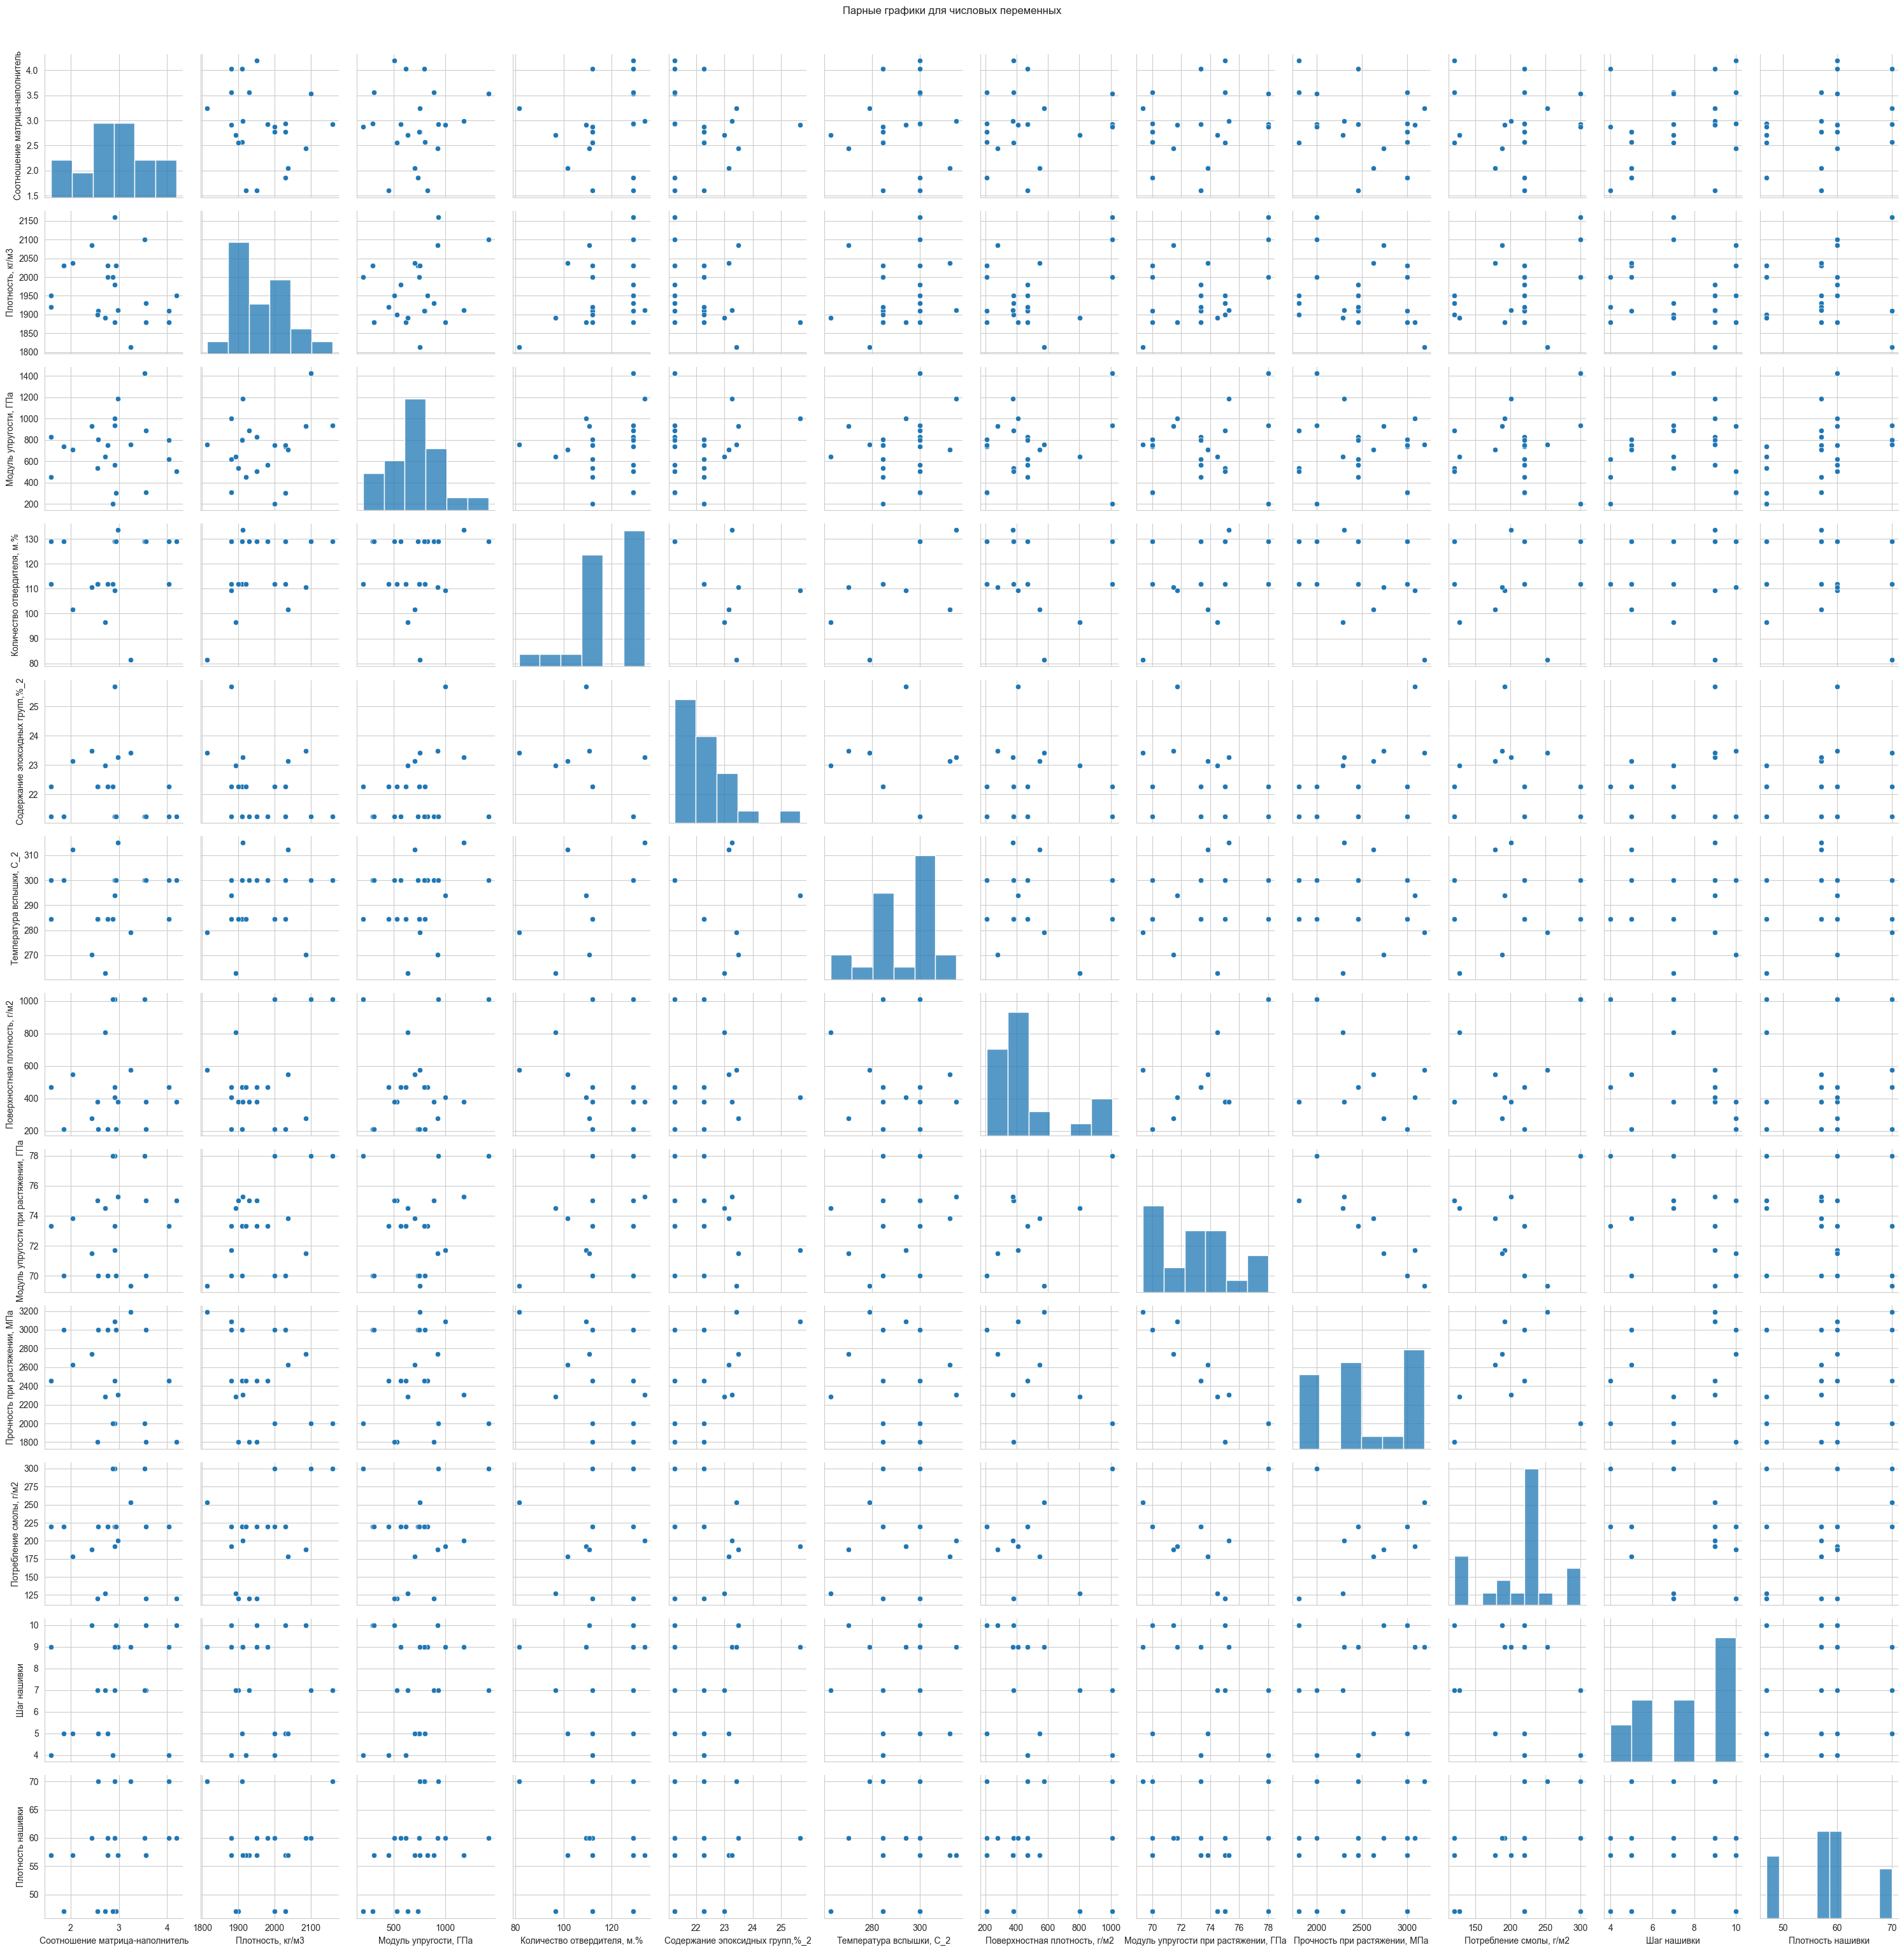

In [144]:
sns.pairplot(dataset_result_filtered, vars = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
                            'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                            'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'])
plt.tight_layout()
plt.suptitle('Парные графики для числовых переменных', y = 1.02)

По полученным графикам видна слабая линейность, либо сильный разброс точек, который свидетельствует о нелинейной зависимости, либо об отсутствии корреляции. 
Например, между Модулем упругости при растяжении и Поверхностной плотностью видня явная прямая зависимость, а между Плотностью при растяжении и Соотношением матрица-наполнитель - несильная обратная зависимость.
Более детально необходимо рассмотреть интересующие нас данные.

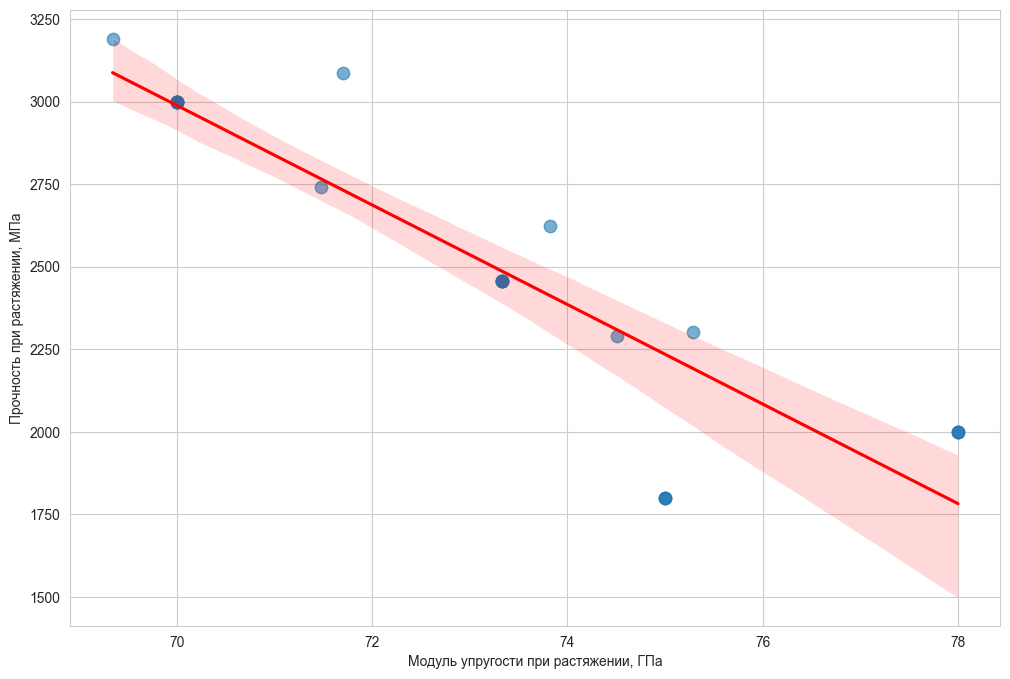

In [145]:
# Посмотрим взаимосвязь между интересующими данными
plt.figure(figsize=(12,8))
sns.regplot(data = dataset_result_filtered, x = 'Модуль упругости при растяжении, ГПа', y = 'Прочность при растяжении, МПа', 
            scatter_kws={'alpha':0.6, 's':80}, line_kws={'color': 'red'}, ci = 95, robust=False) #--->> показывает диаграмму рассеяния с линией регрессии и доверительный интервал

plt.show()

По графику видно, что между двумя переменными присутствует линейная зависимость. Диаграмма рассеяния с линией регрессии с доверительным интервалом - наглядное представление линейной зависимости между двумя переменными, которая также подчеркивает диапазон близких значений.

Следующим необходимым этапом является применение MinMaxScaler и StandartScaler к данным для нормализации и стандартизации dataseta.
MinMaxScaler применяется для повышения точности моделей машинного обучения, устранения аномалий данных.
StandartScaler применяется, поскольку признаки имеют разные единицы измерения, нужно перед обучением нейросети.

In [146]:
scaler_minmax = MinMaxScaler() #MinMaxScaler
dataset_minmaxS = pd.DataFrame(scaler_minmax.fit_transform(dataset_result_filtered), columns = dataset_result_filtered.columns)

scaler_standard = StandardScaler() #StandardScaler
dataset_standard = pd.DataFrame(scaler_standard.fit_transform(dataset_minmaxS), columns = dataset_minmaxS.columns)

# без фильтрации:
# scaler_minmax = MinMaxScaler() #MinMaxScaler
# dataset_minmaxS = pd.DataFrame(scaler_minmax.fit_transform(dataset_result), columns = dataset_result.columns)

# scaler_standard = StandardScaler() #StandardScaler
# dataset_standard = pd.DataFrame(scaler_standard.fit_transform(dataset_minmaxS), columns = dataset_minmaxS.columns)
dataset_standard.to_csv('standard_for_model.csv', float_format= lambda x: f"{x:.9f}")

dataset_standard

Соотношение матрица-наполнитель  Плотность, кг/м3  Модуль упругости, ГПа  \
0                      -1.481388199       0.791310817            0.054416460   
1                      -0.178529770       0.791310817            0.106455479   
2                      -0.183393774       0.429546282            0.088213018   
3                      -0.465998611      -0.655747322            0.303474055   
4                      -0.477606261      -0.776335501           -0.688915809   
5                       0.941194002      -0.414570966            0.602650411   
6                       0.906022305       1.635428065            2.543648233   
7                       0.032887146       2.358957134            0.763184066   
8                      -1.850459237      -0.173394609            0.376443898   
9                       0.032887146       0.188369926           -0.568515568   
10                      1.614021282      -0.655747322            0.277934610   
11                      0.054413765       0.791310817           -1.539014479   
12                      0.941194002      -1.017511857           -1.498881066   
13                      1.848348102      -0.173394609           -0.794722081   
14                     -0.027424412       0.429546282           -1.892918218   
15                     -1.850459237      -0.535159144           -0.977146689   
16                      1.614021282      -1.017511857           -0.371496992   
17                     -1.211565889       0.883341435           -0.059292283   
18                     -0.266571419      -0.871948372           -0.301983915   
19                      0.125072325      -0.627825889            1.675642198   
20                      0.027858899      -1.017875479            1.019564258   
21                      0.500251064      -1.822623653            0.124239978   
22                     -0.644774510       1.460525005            0.757020435   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                   0.870133501                     -0.867680124   
1                  -0.443801474                      0.072004274   
2                  -0.443801474                      0.072004274   
3                  -0.443801474                      0.072004274   
4                  -0.443801474                      0.072004274   
5                   0.870133501                     -0.867680124   
6                   0.870133501                     -0.867680124   
7                   0.870133501                     -0.867680124   
8                   0.870133501                     -0.867680124   
9                   0.870133501                     -0.867680124   
10                  0.870133501                     -0.867680124   
11                  0.870133501                     -0.867680124   
12                  0.870133501                     -0.867680124   
13                  0.870133501                     -0.867680124   
14                 -0.443801474                      0.072004274   
15                 -0.443801474                      0.072004274   
16                 -0.443801474                      0.072004274   
17                 -1.229000175                      0.883067271   
18                 -1.616431466                      0.738030676   
19                  1.218855269                      0.991454270   
20                 -0.644684001                      3.224637707   
21                 -2.780377187                      1.137936982   
22                 -0.543087130                      1.197644415   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                0.618232602                   -1.017351884   
1               -0.638882997                   -1.017351884   
2               -0.638882997                   -1.017351884   
3               -0.638882997                   -1.017351884   
4               -0.638882997                   -0.347819499   
5                0.618232602                   -0.347819499   
6        

Для оценки качества преобразования dataset необходимо построить тепловую карту.

Text(0.5, 1.0, 'Треугольная тепловая карта корреляции')

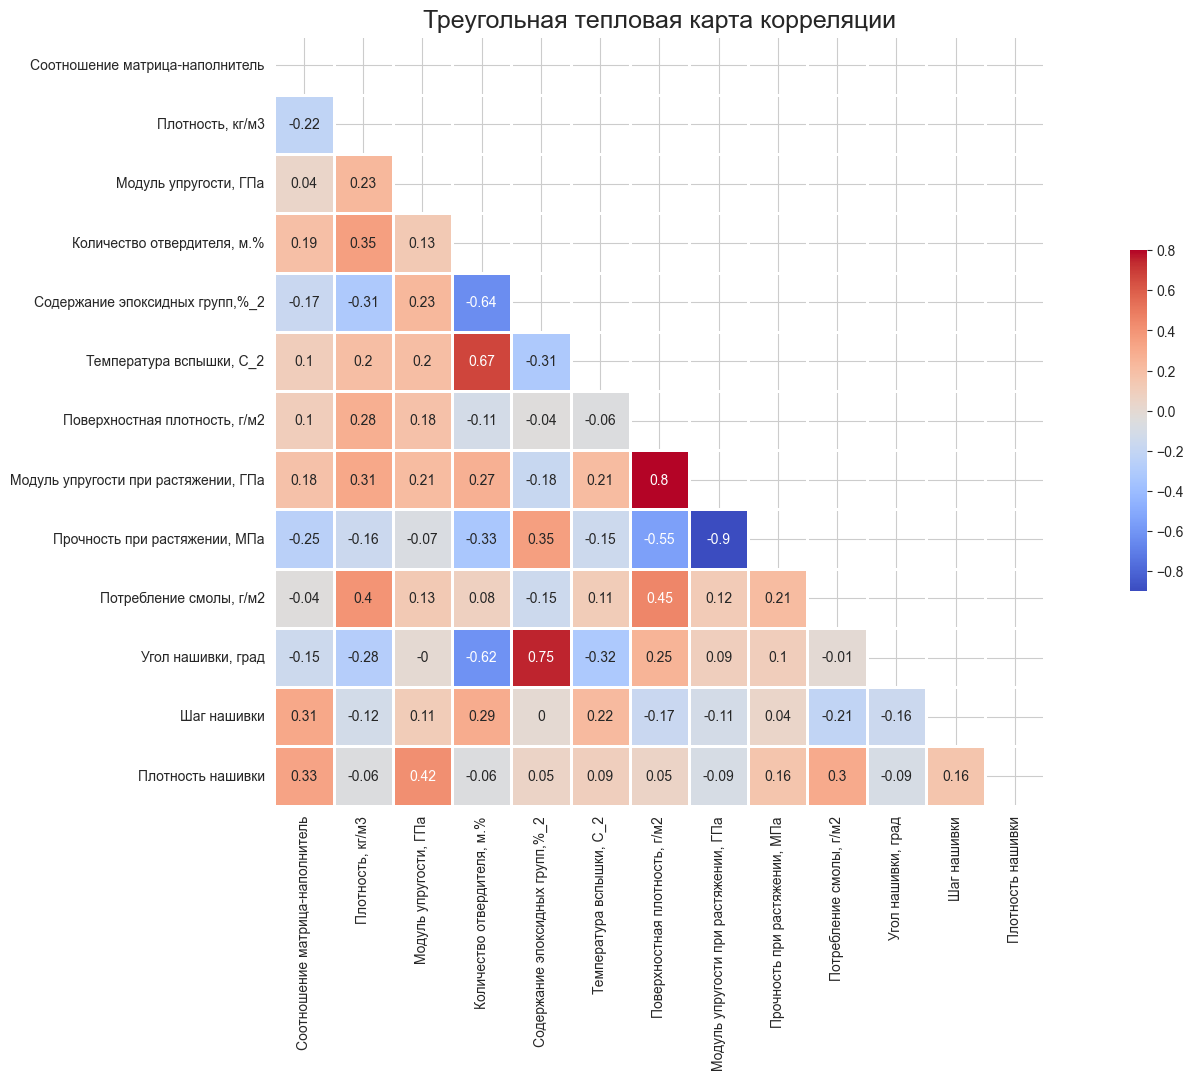

In [147]:
sns.set_style('whitegrid')
mask = np.triu(np.ones_like(dataset_standard.corr(), dtype = bool))               # Изолируем верхний треугольник тепловой карты
plt.figure(figsize = (22, 10))
heatmap = sns.heatmap(dataset_standard.corr().round(2), annot = True, square = True, cmap = 'coolwarm', cbar_kws = {'fraction': 0.01}, linewidths = 2, mask = mask)
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict = {'fontsize': 18})

Теперь необходимо построить гистограммы для визуальной оценки dataset после применения нормализации и стандартизации.

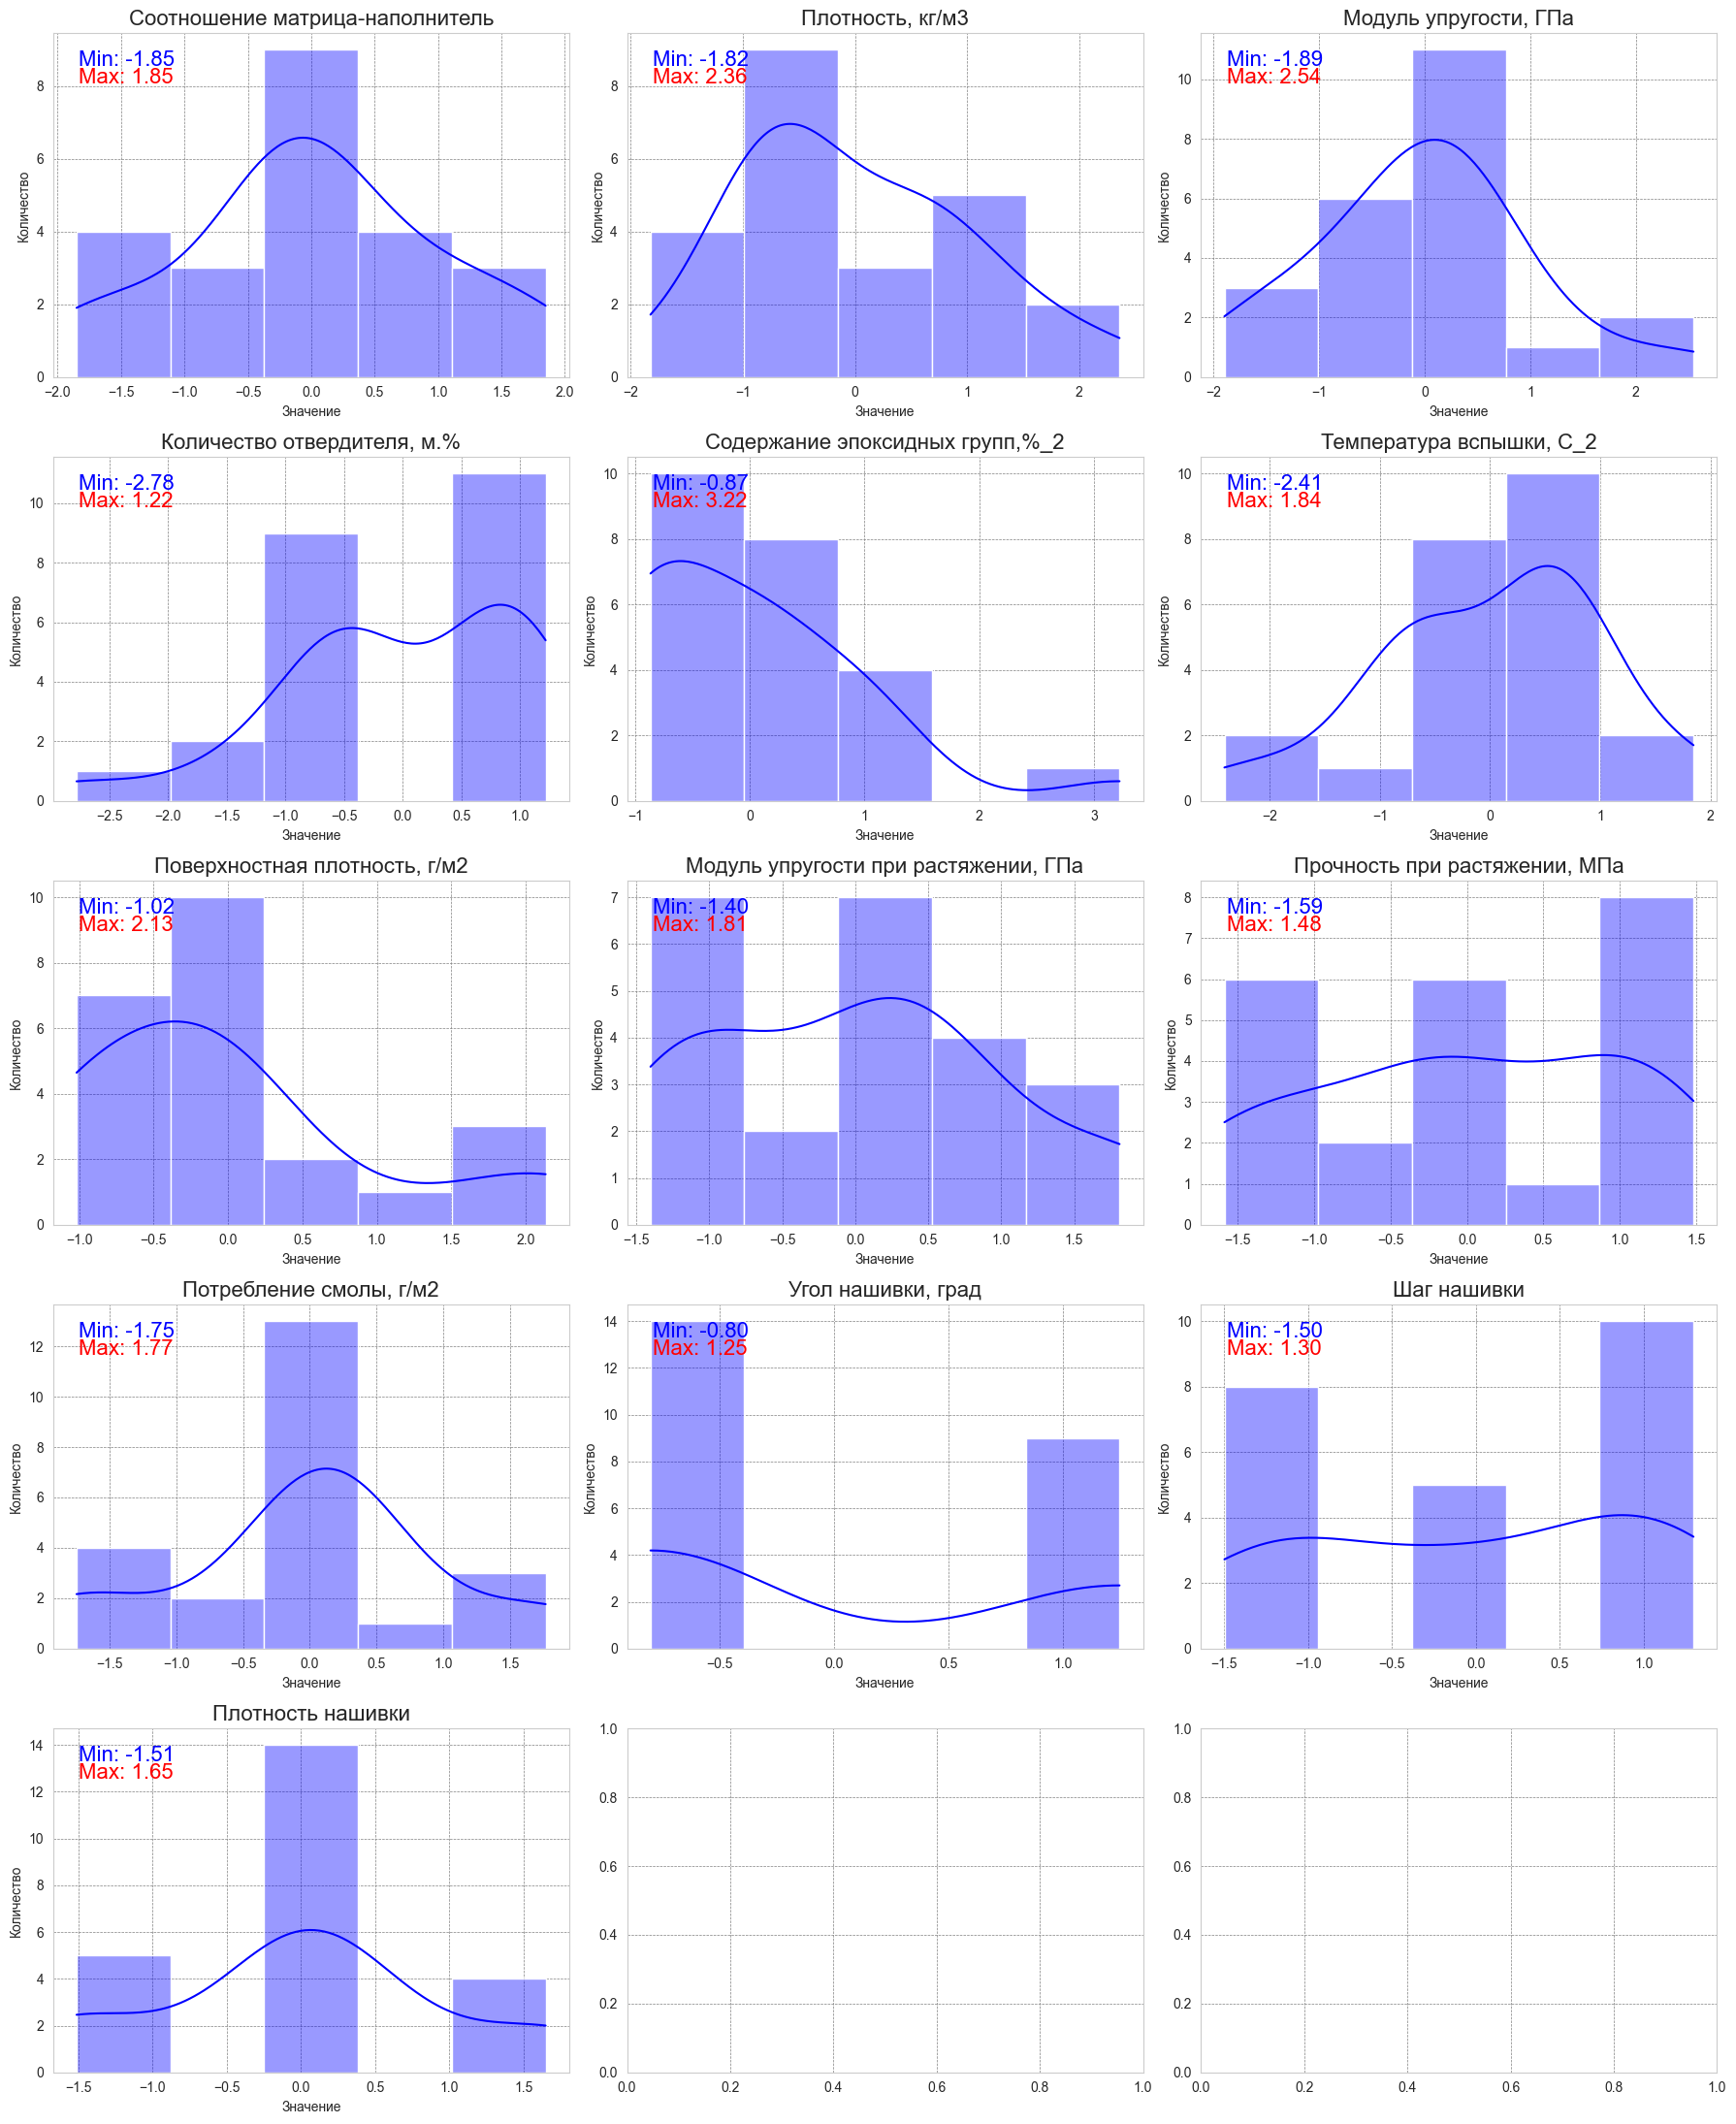

In [148]:
# Создание фигуры с подзаголовками
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(18,22))
i = 1
dict_min_max = {}
data = dataset_standard
bins = 5
# Перебираем список названий столбцов
column_names = dataset_standard.columns.tolist()

# Перебираем все оси и строим гистограммы
for i in range(5):                      # строки
    for j in range(3):                  # столбцы
        column_index = i * 3 + j        # вычисляем индекс колонки
        if column_index < len(column_names):
            plot_histogram(axs[i, j], column_index, column_names[column_index])


# Настройка сетки
for ax in axs.flatten():
    ax.grid(True, linestyle = '--', linewidth = 0.5, color = 'gray')

plt.tight_layout()                                              # автоматическая настройка отступов
plt.savefig("hist_3.jpg", format = "jpeg")                        # Сохраним график в файл

plt.show()

После стандартизации и нормализации графики стали более наглядными. Заметно, что графики визуально почти не изменились после стандартизации и нормализации, формы распределений остались прежними, в первую оче-редь из-за того, что слишком мало данных осталось после фильтрации. Од-нако, каждый из них находится в одинаковом диапазоне значений и симмет-ричен относительно нуля, кроме графиков: «Содержание эпоксидных групп», «Поверхностная плотность» и «Количество отвердителя».

Далее необходимо построить графики рассеяния точек.

Text(0.5, 1.02, 'Парные графики для числовых переменных')

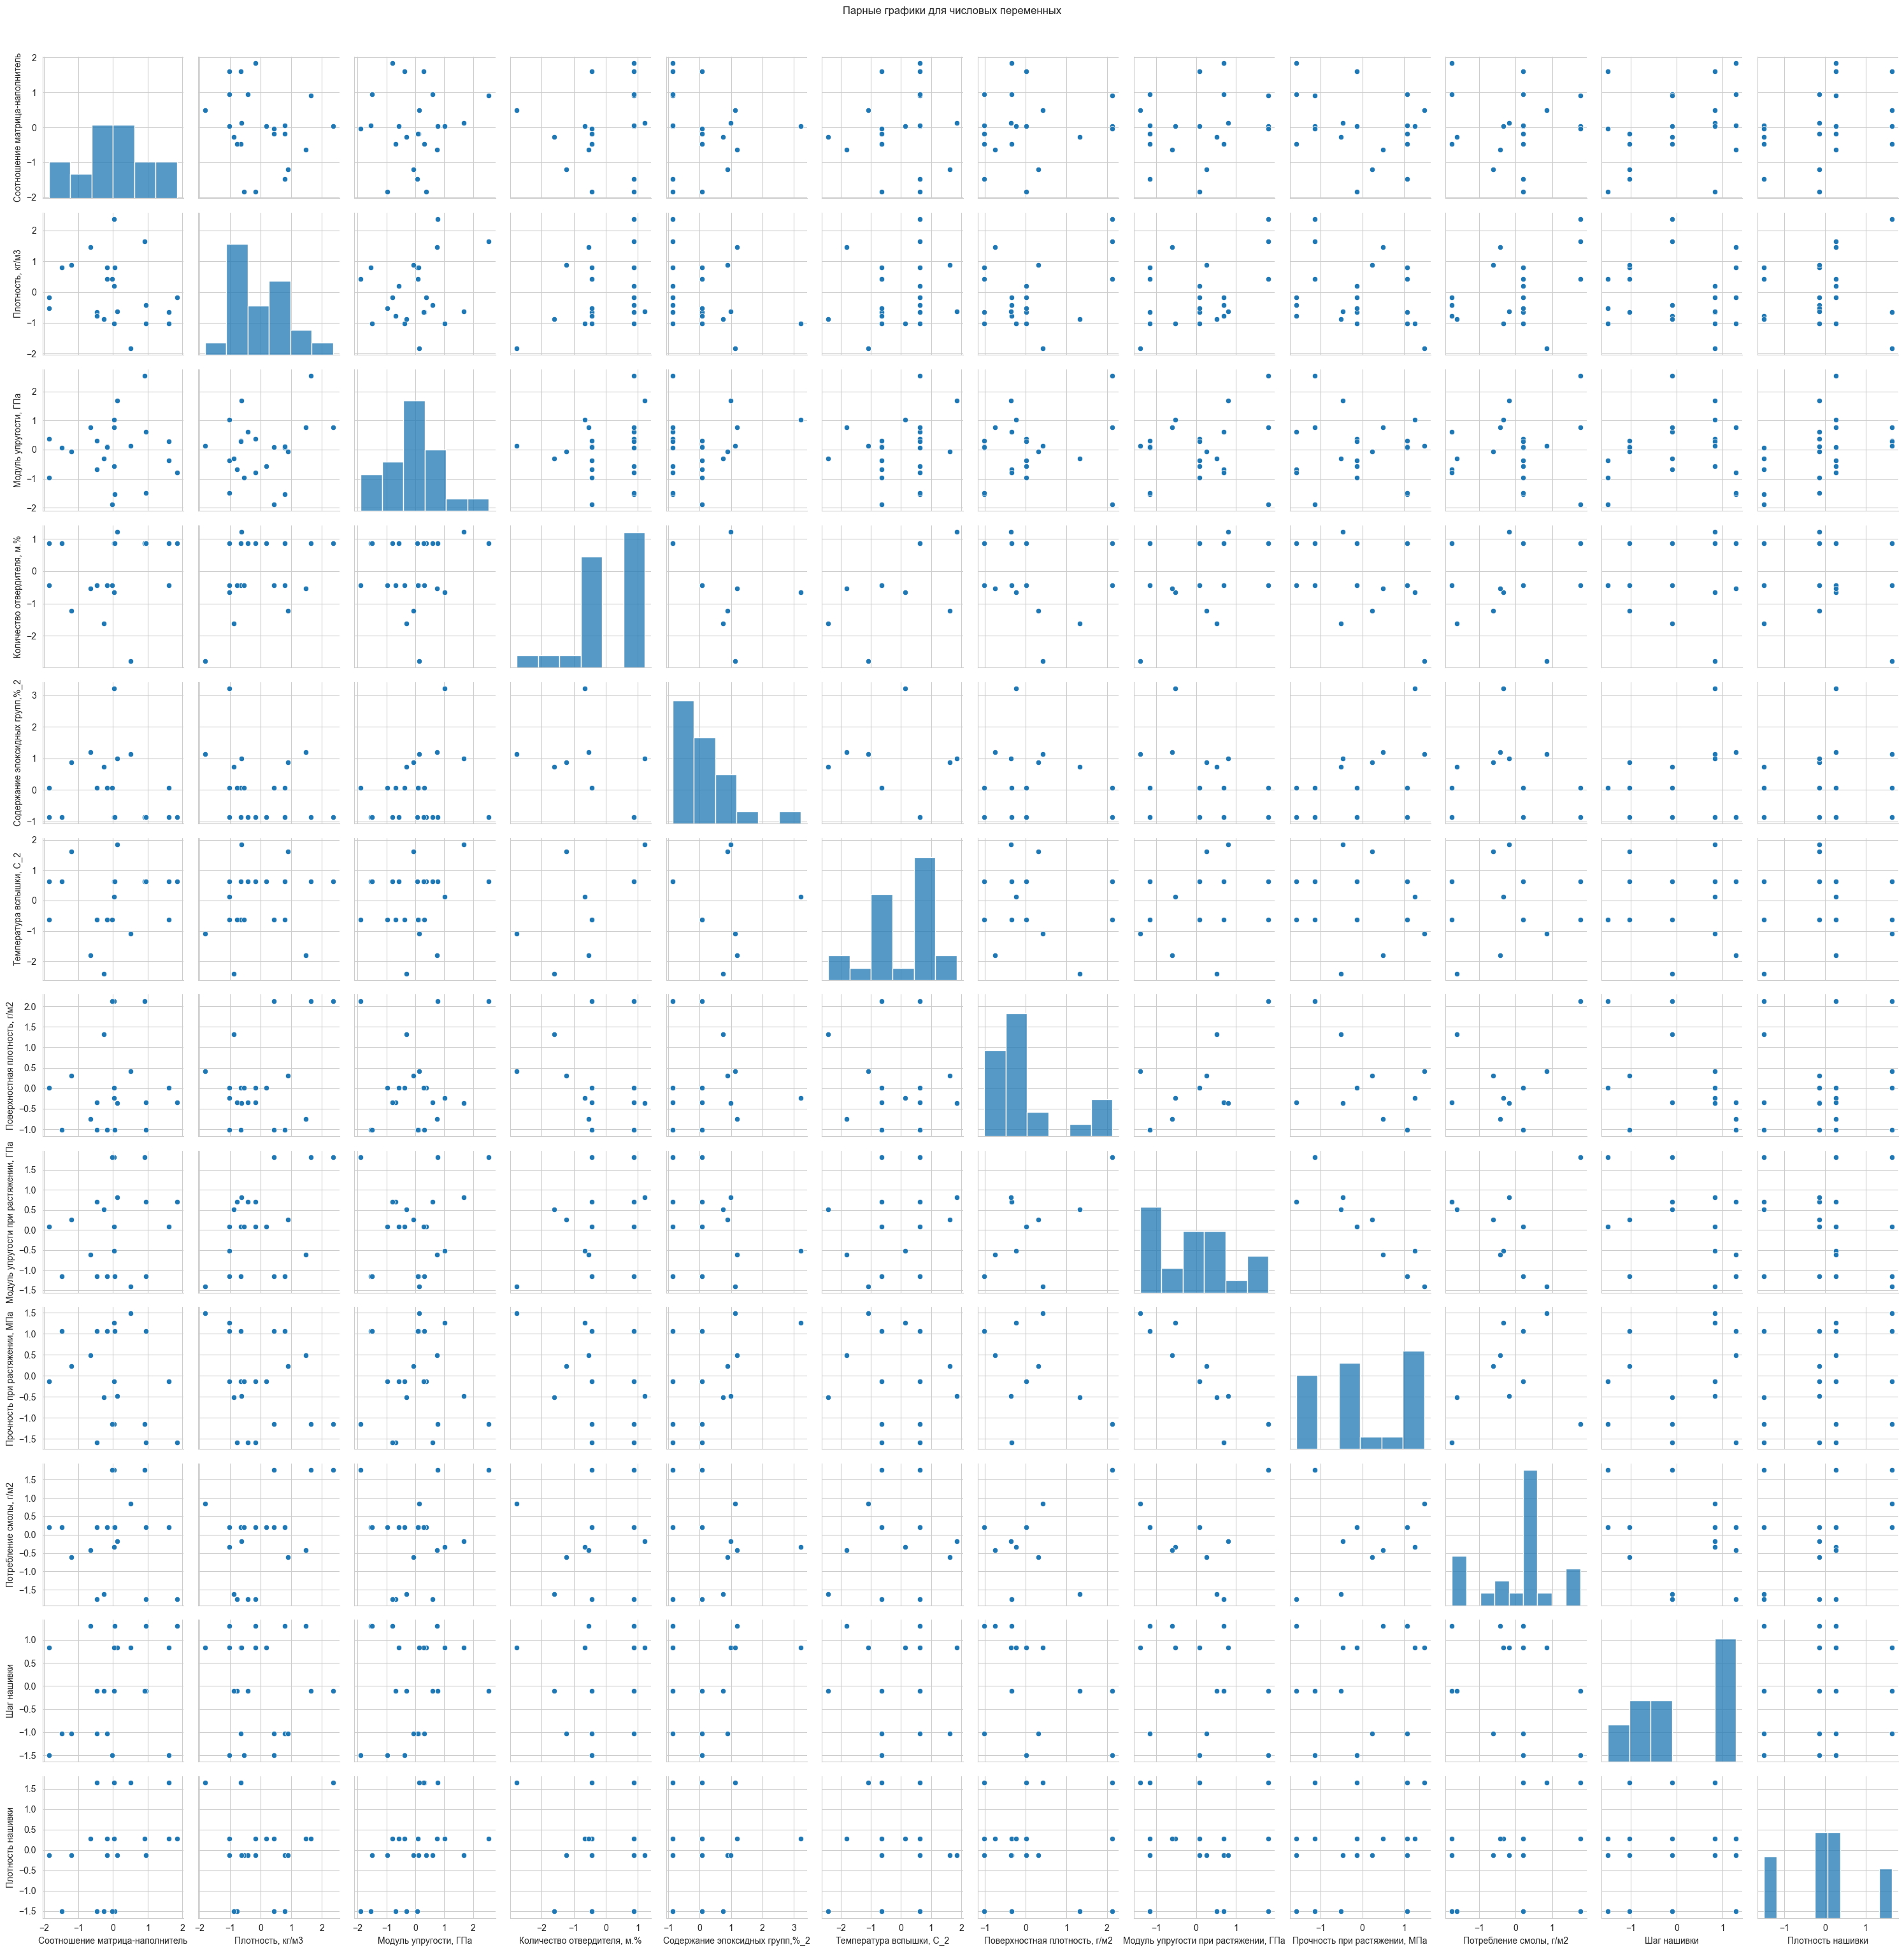

In [149]:
sns.pairplot(dataset_standard, vars = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'Модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
                            'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа',
                            'Потребление смолы, г/м2', 'Шаг нашивки', 'Плотность нашивки'])
plt.tight_layout()
plt.suptitle('Парные графики для числовых переменных', y = 1.02)

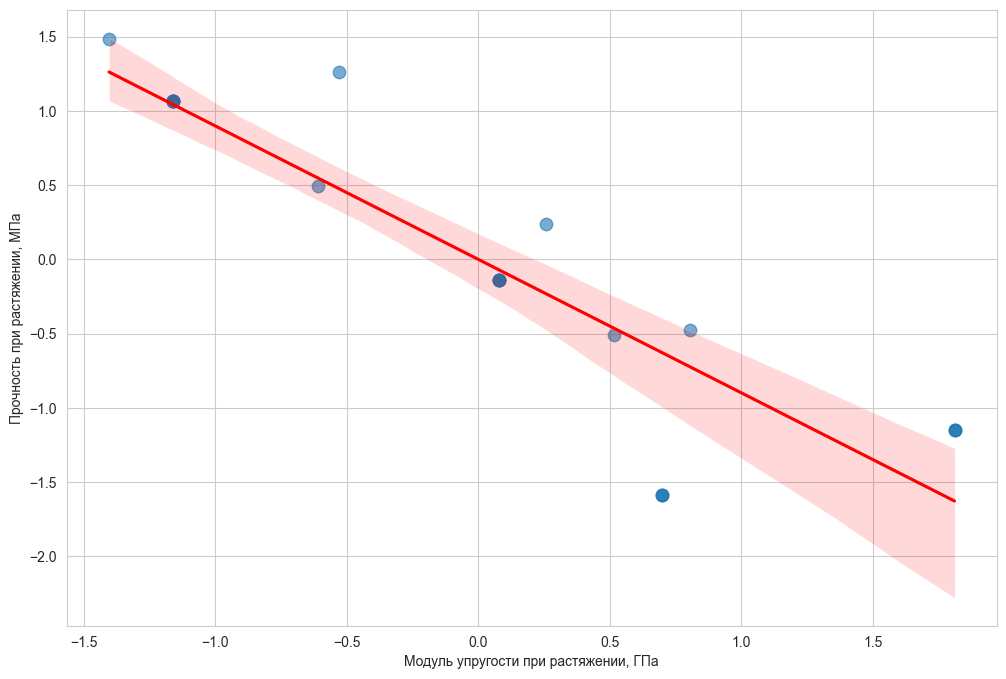

In [150]:
# Посмотрим взаимосвязь между интересующими данными
plt.figure(figsize=(12,8))
sns.regplot(data = dataset_standard, x = 'Модуль упругости при растяжении, ГПа', y = 'Прочность при растяжении, МПа', 
            scatter_kws={'alpha':0.6, 's':80}, line_kws={'color': 'red'}, ci = 95, robust=False) #--->> показывает диаграмму рассеяния с линией регрессии и доверительный интервал

plt.show()

По графику видна линейная зависимость между переменными. Можно сделать вывод, что для решения поставленной задачи модели понадобятся не только регрессионные, но также следует использовать линейную модель, также она хороша в качестве базовой модели.

In [151]:
# Проверяем данные на неинформативность - если признак имеет слишком много строк с одинаковыми значениями
num_rows = len(dataset_standard.index)
low_information_cols = []

for col in dataset_result_filtered.columns:
    cnts = dataset_result_filtered[col].value_counts(dropna = False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
print('OK!')

OK!


In [152]:
# Проверяем наличие дубликатов - удаляем их
dataset_result_dedupped = dataset_standard.drop(column_names, axis = 1).drop_duplicates()

print(dataset_standard.shape)
print(dataset_result_dedupped.shape)

(23, 13)
(23, 0)


Проверка на неинформативность и наличие дубликатов показала их отсутствие.
Последняя версия датасета - dataset_standard.

После проведения обработки исходного dataset, оценив результаты по heatmap, можно сделать выводы, что нормализация, стандартизация и удаление выбросов привели к минимальным изменениям картины. Это говорит, в свою очередь, о наличии более сложной зависимости для входных признаков, либо о проблемах с самими исходными данными, которые были плохо собраны или обработаны.

### Model Planning - планирование модели

Следующим этапом будет обучение нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. При построении моделей проведен поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
В качестве моделей выбраны: Линейная регрессия (одна из самых простых базовых моделей), Случайный лес (хорошо работает с нелинейными зависимостями, устойчив к переобучению), Градиентный бустинг (высокая точность прогнозирования, показывает высокую эффективность на структурированных данных, хорошо работает с различными типами данных).

#### Linear Regression

In [153]:
dataset_standard_reduced = dataset_standard.drop(['Соотношение матрица-наполнитель'], axis = 1)     # Вырезаем параметр "Соотношение матрица-накопитель" для дальнейшего предсказания его, 
                                                                                                    # в обучении он принимать участие не должен

In [154]:
# Разделим данные на признаки и целевые переменные (для удобства засунем в функцию, поскольку планируется использование нескольких моделей)
def preprocess_data(dataset_standard_reduced):
    X = dataset_standard_reduced.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis = 1)
    y_modulus = dataset_standard_reduced['Модуль упругости при растяжении, ГПа']
    y_strength = dataset_standard_reduced['Прочность при растяжении, МПа']

    # Разделим на обучающую и тестовую выборки, на 70% и 30%, соответственно
    X_train, X_test, y_train_modulus, y_test_modulus = train_test_split(X, y_modulus, test_size = 0.3, random_state = 0)
    _, _, y_train_strength, y_test_strength = train_test_split(X, y_strength, test_size = 0.3, random_state = 0)

    # Стандартизируем данные
    scaler = StandardScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)

    return(
        X_train_scaler, X_test_scaler,
        y_train_modulus, y_test_modulus,
        y_train_strength, y_test_strength
    )

# Настройка модели
param_grid_LR = {'fit_intercept': [True]}

# Метод оценки производительности модли МО, разделяющий набор данных на К-подмножеств. таким образом используем все данные для обучения и тестирования
kf = KFold(n_splits = 10, shuffle = True, random_state = 0)

# Получаем данные
X_train_scaler, X_test_scaler, y_train_modulus, y_test_modulus, y_train_strength, y_test_strength = preprocess_data(dataset_standard_reduced)

# Поиск гиперпараметров для модуля упругости
model_modulus = GridSearchCV(LinearRegression(), param_grid_LR, cv = kf, scoring = 'neg_mean_squared_error')

# Обучение для модуля упругости
model_modulus.fit(X_train_scaler, y_train_modulus)

# Поиск гиперпараметров для прочности 
model_strength = GridSearchCV(LinearRegression(), param_grid_LR, cv = kf, scoring = 'neg_mean_squared_error')

# Обучение для прочности
model_strength.fit(X_train_scaler, y_train_strength)

# Оценка моделей с помощью метрик
y_pred_modulus = model_modulus.predict(X_test_scaler)
y_pred_strength = model_strength.predict(X_test_scaler)

print("Метрики оценки качества предсказания Модуля упругости при растяжении:")
# Для оценки результатов работы модели проверим среднеквадратическую ошибку, чем ближе к 0, тем точнее работает модель
print(f"MSE: {mean_squared_error(y_test_modulus, y_pred_modulus)}")
# Также оценим коэффициент детерминации, чем выше значение, тем точнее модель показывает взаимосвязи между переменными
print(f"R2: {r2_score(y_test_modulus, y_pred_modulus)}") 
print(f"MAE: {mean_absolute_error(y_test_modulus, y_pred_modulus)}")

print("\nМетрики оценки качества предсказания Прочности при растяжении:")
print(f"MSE: {mean_squared_error(y_test_strength, y_pred_strength)}")
print(f"R2: {r2_score(y_test_strength, y_pred_strength)}")
print(f"MAE: {mean_absolute_error(y_test_strength, y_pred_strength)}")

Метрики оценки качества предсказания Модуля упругости при растяжении:
MSE: 0.4778754348845088
R2: 0.5977508650571022
MAE: 0.4137763261241249

Метрики оценки качества предсказания Прочности при растяжении:
MSE: 0.8835398205925087
R2: 0.33810080977459633
MAE: 0.6430355589143629


Метрики качества, используемые для оценки работы модели:
- MSE - средняя квадратическая ошибка, измеряющая среднее значение квадратов разностей между фактическим и предсказанным значениями. Чем ближе метрика к нулю, тем лучше;
- R2 - коэффициент детерминации, показывающий долю дисперсии зависимой переменной. Чем ближе значение к нулю, тем хуже модель объясняет дисперсию зависимой переменной, чем ближе к единице - тем лучше;
- MAE - средняя абсолютная ошибка, измеряющая абсолютное отклонение между предсказанными и фактическими значениями. Чем ближе метрика к нулю, тем лучше, тем меньше ошибок в прогнозах.

Результаты работы модели на Итерации 3.2 существенно лучше, полученных ранее (Итерации 1, 2 и 3.1). Средняя квадратическая ошибка уменьшилась, после более тщательной фильтрации модель стала больше подходить, поскольку между данными была обнаружена небольшая линейность, в результате чего увеличился и коэффициент детерминации, также хорошим показателем является уменьшение средней абсолютной ошибки. 

Можно сделать вывод, что линейная модель слабо, но подходит для поставленной задачи. Стоит попробовать более сложные модели, например, Случайный лес и Градиентный бустинг.

Однако результаты все еще далеки от идеальных, но с текущим набором данных существенно улучшить их не получится. Нужно применять более сложные методы фильтрации, но самым рабочим вариантом будет сборка нового dataset.

#### Random Forest Regressor

In [155]:
X_train_scaler_rf, X_test_scaler_rf, y_train_modulus_rf, y_test_modulus_rf, y_train_strength_rf, y_test_strength_rf = preprocess_data(dataset_standard_reduced)

rf_modulus = RandomForestRegressor(
    n_estimators=50,                    # Данный параметр указывает, сколько будет деревьев
    max_features='sqrt',                # Параметр, определяющий количество признаков, рассматриваемых при поиске лучшего разделения узла
    max_leaf_nodes=None,                # Указываем, что нет ограничений на максимальное количество узлов в дереве
    min_samples_split=2,                # Минимальное количество выборок, необходмое для разделения внутреннего узла
    random_state = 0,                   # Начальное значение для генератора чисел, обеспечивающее воспроизводимость результатов 
    oob_score=True)                     # Метод out-of-bag, оценивающий точность модели, в котором используются образцы, не включенные в обучающую выборку для каждого дерева  

rf_strength = RandomForestRegressor(n_estimators=50, max_features='sqrt', max_leaf_nodes=None, min_samples_split=2, random_state = 0, oob_score=True)

# Параметры настройки 
param_grid_rf = {
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [None, 30, 100],
    'min_samples_split': [2, 5, 10]
}

# Настроим Grid Search для автоматического поиска оптимальных параметров для каждой модели, для достижения лучшей производительности
grid_search_modulus_rf = GridSearchCV(
    estimator = rf_modulus,                                 # Указание модели, которую необходимо настроить
    param_grid = param_grid_rf,                             # Указание сетки параметров
    cv = 10,                                                # 10-кратная перекрестная проверка
    scoring = 'neg_mean_squared_error',                     # Парметр позволяет вычислить разницу между фактическим зависимым признаком (y) и предсказанным признаком (y')
    n_jobs = -1                                             # Для ускорения вычислений используются все доступные ядра процессора
)

grid_search_strength_rf = GridSearchCV(
    estimator = rf_strength,
    param_grid = param_grid_rf,
    cv = 10,
    scoring = 'neg_mean_squared_error',                     
    n_jobs = -1
)

# Загрузка данных была произведена при обучении первой модели, используем их же
# Обучение для модуля упругости
grid_search_modulus_rf.fit(X_train_scaler_rf, y_train_modulus_rf)
best_rf_modulus = grid_search_modulus_rf.best_estimator_

# Обучение для прочности
grid_search_strength_rf.fit(X_train_scaler_rf, y_train_strength_rf)
best_rf_strength = grid_search_strength_rf.best_estimator_

# Оценка моделей с помощью метрик
y_modulus_pred = best_rf_modulus.predict(X_test_scaler_rf)
y_strength_pred = best_rf_strength.predict(X_test_scaler_rf)

# Оценка модуля упругости
print(f"Метрики оценки качества предсказания Модуля упругости при растяжении:")
print(f"MSE: {mean_squared_error(y_test_modulus_rf, y_modulus_pred)}")
print(f"R2: {r2_score(y_test_modulus_rf, y_modulus_pred)}")
print(f"MAE: {mean_absolute_error(y_test_modulus_rf, y_modulus_pred)}")

# Оценка прочности
print(f"\nМетрики оценки качества предсказания Прочности при растяжении:")
print(f"MSE: {mean_squared_error(y_test_strength_rf, y_strength_pred)}")
print(f"R2: {r2_score(y_test_strength_rf, y_strength_pred)}")
print(f"MAE: {mean_absolute_error(y_test_strength_rf, y_strength_pred)}")

Метрики оценки качества предсказания Модуля упругости при растяжении:
MSE: 0.6478537361895907
R2: 0.4546725235734963
MAE: 0.6266355626370371

Метрики оценки качества предсказания Прочности при растяжении:
MSE: 0.8974927882804078
R2: 0.32764801772310936
MAE: 0.7537245967336538


На текущий момент модель Случайного леса показала результаты предсказания Модуля упругости при растяжении хуже, чем линейная регрессия, однако для Прочности при растяжении результаты стали на 0.01 лучше, что незначительно. Оценки лучше, чем на Итерации 1, 2 и 3.1.

#### Gradient Boosting Regressor

In [156]:
X_train_scaler_GB, X_test_scaler_GB, y_train_modulus_GB, y_test_modulus_GB, y_train_strength_GB, y_test_strength_GB = preprocess_data(dataset_standard_reduced)

# Настройка параметров для Grid Search
param_grid_GB = {
    'n_estimators': [100, 200, 300],     # Параметр, указывающий количество деревьев в ансамбле
    'learning_rate': [0.01, 0.1, 0.2],   # Параметр, указывающий темп обучения. Чем меньше темп обучения, тем больше нужно деревьев для достижения хорошей производительности
    'max_depth': [3, 4, 5],              # Параметр, указывающий максимальную глубину каждого дерева. Чем глубже дерево, тем более сложные зависимости оно охватывает, однако, это может привести к переобучению
    'min_samples_split': [2, 5, 10],     # Минимальное количество выборок, которое необходимо для разделения внутреннего узла
    'min_samples_leaf': [1, 2, 4]        # Минимальное количество выборок 
}

# Создание моделей 
model_modulus_GB = GradientBoostingRegressor(random_state = 0)          # Указывается начальное значение для генератора случайных чисел
model_strength_GB = GradientBoostingRegressor(random_state = 0)

# Настройка Grid Search
grid_search_modulus_GB = GridSearchCV(
    estimator = model_modulus_GB,                                       # Указание модели, которую необходимо настроить
    param_grid = param_grid_GB,                                         # Указание сетки параметров
    cv = 10,                                                            # 10-кратная перекрестная проверка
    scoring = 'neg_mean_squared_error',                                 # Парметр позволяет вычислить разницу между фактическим зависимым признаком (y) и предсказанным признаком (y')
    verbose = 1,                                                        # Вывод информации о прогрессе
    n_jobs = -1                                                         # Для ускорения вычислений используются все доступные ядра процессора
)
grid_search_strength_GB = GridSearchCV(
    estimator = model_strength_GB,
    param_grid = param_grid_GB,
    cv = 10,
    scoring = 'neg_mean_squared_error',
    verbose = 1,
    n_jobs = -1
)
# Обучение моделей
grid_search_modulus_GB.fit(X_train_scaler_GB, y_train_modulus_GB)
grid_search_strength_GB.fit(X_train_scaler_GB, y_train_strength_GB)

# Оценка качества моделей
y_pred_modulus_GB = grid_search_modulus_GB.predict(X_test_scaler_GB)
y_pred_strength_GB = grid_search_strength_GB.predict(X_test_scaler_GB)

# Вывод результатов
# Оценка модуля упругости
print(f"Метрики оценки качества предсказания Модуля упругости при растяжении:")
print(f"MSE: {mean_squared_error(y_test_modulus_GB, y_pred_modulus_GB)}")
print(f"R2: {r2_score(y_test_modulus_GB, y_pred_modulus_GB)}")
print(f"MAE: {mean_absolute_error(y_test_modulus_GB, y_pred_modulus_GB)}")

# Оценка прочности
print(f"\nМетрики оценки качества предсказания Прочности при растяжении:")
print(f"MSE: {mean_squared_error(y_test_strength_GB, y_pred_strength_GB)}")
print(f"R2: {r2_score(y_test_strength_GB, y_pred_strength_GB)}")
print(f"MAE: {mean_absolute_error(y_test_strength_GB, y_pred_strength_GB)}")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Метрики оценки качества предсказания Модуля упругости при растяжении:
MSE: 0.6538534519946733
R2: 0.4496222943373337
MAE: 0.5346475314228867

Метрики оценки качества предсказания Прочности при растяжении:
MSE: 0.814174311829242
R2: 0.39006561431412434
MAE: 0.6055361914763763


На текущий момент модель Градиентного бустинга показала результаты предсказания Модуля упругости при растяжении хуже, чем линейная регрессия и случайный лес, однако для Прочности при растяжении результаты стали лучше, но незначительно. Оценки лучше, чем на Итерации 1, 2 и 3.1. 

Полученные результаты говорят о том, что исходный dataset плохо собран. Большое количество пиков на диаграммах вероятно свидетельствует о том, что данных были собраны из разных источников, что тоже влияет на качество. Для получения хороших результатов, требуется дополнить dataset другими данными, либо собрать его заново.

### 

### Рекомендательная система

На следующем этапе необходимо создать систему. рекомендующую Соотношение матрица-наполнитель.
Модель будет иметь вид многослойного перцептрона с двумя скрытыми слоями. 
Данный код реализует нейронную сеть для задачи регрессии, которая далее будет использована в качестве основы для рекомендательной системы.
Модель не персонализированная и основана на прямом предсказании значения, то есть предсказывает Соотношение матрица-наполнитель на основе других признаков материала.
Подходит для предсказания характеристик новых материалов на основе известных.

In [157]:
# # Создадим подкласс базового класса для определения структуры нейросети
# class Recommendation_system (nn.Module):                    # Создание класса, который наследуется от базового класса для всех нейросетей при использовании PyTorch
#     def __init__(self, input_size):                         # Конструктор класса для определения нейросети
#         super(Recommendation_system, self).__init__()       # Вызов конструктора родительского класса
#         # Входной слой
#         self.fc1 = nn.Linear(input_size, 128)               # Линейный слой (количество входных и выходных признаков (нейронов))
#         # Скрытые слои
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, 32)
#         # Выходной слой 
#         self.fc4 = nn.Linear(32, 1)

#         # Функция активации
#         self.relu = nn.ReLU()                               # Функция активации для добавления нелинейности в модель
#         self.dropout = nn.Dropout(0.2)                      # Для предотвращения переобучения включаем в случайный момент слой (случайное выключение нейронов), то есть 50% выключится

#     def forward(self, x):                                   # Прямой проход через сеть: получает входные данные х и последовательно пропускает через слои, применяя функции активации
#         x = self.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.relu(self.fc2(x))
#         x = self.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

# # Разделение данных на признаки и целевую переменную    
# X_RS = dataset_standard.drop(['Соотношение матрица-наполнитель'], axis = 1).values      # Все признаки кроме соотношения
# Y_RS = dataset_standard['Соотношение матрица-наполнитель'].values                       # Целевое соотношение

# # Разделение на обучающую и тестовую выборки
# X_train_RS, X_val_RS, Y_train_RS, Y_val_RS = train_test_split(X_RS, Y_RS, test_size = 0.2, random_state = 42)                   # Валидационная и тестовая выборки
# X_train_RS, X_test_RS, Y_train_RS, Y_test_RS = train_test_split(X_train_RS, Y_train_RS, test_size = 0.3, random_state = 42)     # Тестовая и обучающая выборки    

# scaler = StandardScaler()
# X_train_RS = scaler.fit_transform(X_train_RS)
# X_val_RS = scaler.transform(X_val_RS)
# X_test_RS = scaler.transform(X_test_RS)

# # Конвертация в тензоры PyTorch, то есть преобразование в многомерные массивы , которые могут содержать числовые данные разных типов
# def create_dataloaders(X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, batch_size = 8):  # было изменено с 32 на 8, что привело к улучшению результатов
#     train_dataset = TensorDataset(
#         torch.tensor(X_train_RS, dtype = torch.float32),
#         torch.tensor(Y_train_RS, dtype = torch.float32)
#     )
#     val_dataset = TensorDataset(
#         torch.tensor(X_val_RS, dtype = torch.float32),
#         torch.tensor(Y_val_RS, dtype = torch.float32)
#     )
#     test_dataset = TensorDataset(
#         torch.tensor(X_test_RS, dtype = torch.float32),
#         torch.tensor(Y_test_RS, dtype = torch.float32)
#     )

#     train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)   # Для обучеющей выборки перемешивает данные перед каждой эпохой обучения (shuffle)
#     val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = False)      # так модель не запоминает порядок
#     test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

#     return train_loader, val_loader, test_loader

# # Обучение модели
# def train_model(model, train_loader, val_loader, criterion, optimizer, epochs = 100, patience = 10):        # увеличение числа эпох и параметра ранней остановки не улучшило результат
#     best_val_loss = float('inf')                                # Инициализация наименьшей ошибки при валидации значением бесконечность. Для сравнения ошибки валидации с наилучшей найденной
#     epochs_no_improve = 0                                       # Счетчик эпох без улучшения
#     best_model = None                                           # В эту переменную сохраняются лчшие веса модели
                                                                
#     for epoch in range(epochs):
#         model.train()                                                                   # Перевод модели в режим обучения
#         running_loss = 0.0                                                              # Потеря для текущей эпохи
#         for inputs, targets in train_loader:
#             # Обнуление градиентов
#             optimizer.zero_grad()                                                       # Важный этап, позволяющий избежать накопления градиентов от предыдущих итераций

#             # Прямой проход
#             outputs = model(inputs)                                                     # Получение предсказаний модели
#             loss = criterion(outputs, targets.view(-1, 1))                              # Вычисляет функцию потерь (MSE) между предсказаниями и истинными значениями
#                                                                             # view - изменение формы тензора, для преобразования в тензор с одним столбцом, необходимо для loss функции
#             # Обратный проход 
#             loss.backward()                                                             # Вычисляет градиенты функции потерь по параметрам модели
#             optimizer.step()                                                            # Обновляет параметры модели на основе вычисленных градиентов и выбранного алгоритма оптимизации (Adam)

#             running_loss += loss.item()                                                 # Суммирует потери по всем батчам в эпохе, возвращает в виде скаляра

#         val_loss, _ = evaluate_model(model, val_loader, criterion)                      # Оценка на валидации после каждой эпохи. Получение и loss, и R2, но сравнение только по loss

#         if val_loss < best_val_loss:                                                    # Если услвие верное, то обновляет лучшую найденную ошибку
#             best_val_loss = val_loss
#             epochs_no_improve = 0                                                       # Сбрасывание счетчика
#             best_model = model.state_dict()                                             # Сохранение весов лучшей модели
#         else:
#             epochs_no_improve += 1                                                      # Если условие не выполняется, увеличивается счетчик эпох
        
#         if epochs_no_improve == patience:                                               # Если количество эпох достигает значения - остановка!
#             print("Early stopping!")
#             model.load_state_dict(best_model)                                           # Загрузка весов лучшей модели
#             break                                                                       # Прерывание обучения

#         print(f'Epoch [{epoch + 1} / {epochs}], Train Loss: {running_loss / len(train_loader): .4f}, Validation Loss: {val_loss:.4f}')

# # Оценка работы модели
# def evaluate_model(model, data_loader, criterion):
#     model.eval()                                                                        # Перевод модели в режим оценки, в частности это важно для Dropout, его отключения
#     total_loss = 0.0
#     all_targets = []
#     all_predictions = []

#     with torch.no_grad():                                                               # Отключение вычисления градиентов, это ускорит вычисления
#         for inputs, targets, in data_loader:                                            # прямой проход через модель для получения предсказаний
#             # Прямой проход
#             outputs = model(inputs)
#             loss = criterion(outputs, targets.view(-1, 1))                              # Вычисление функции потерь

#             # Накапливаем потери
#             total_loss += loss.item() * inputs.size(0)                                  # Суммирование потерь по всем батчам, input.size(0) дает размер батча, то есть взвешивается 
#                                                                                         # потеря каждого батча по количеству образцов в этом батче
#             # Сборка targets и predictions для R2
#             all_targets.extend(targets.cpu().numpy())                                   # Для избегания утечки памяти: сначала тензоры перемещаются на процессор, а затем отсоединяются
#             all_predictions.extend(outputs.cpu().detach().numpy().flatten())            # от графа вычислений

#     # Вычисляем средние значения
#     avg_loss = total_loss / len(data_loader.dataset)                
#     r2 = r2_score(all_targets, all_predictions)                   
#     return avg_loss, r2

# def main():
#     train_loader, val_loader, test_loader = create_dataloaders(X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS)
#     input_size = X_train_RS.shape[1]                                                    # Количество признаков в обучающей выборке
#     model = Recommendation_system(input_size)                                           # Создание экземпляра модели
#     criterion = nn.MSELoss()                                                            # Функция потерь. Mean Squared Error для задачи регрессии
#     optimizer = optim.Adam(model.parameters(), lr = 0.001)                              # Оптимизатор, скорость обучения. Adam - адаптивный оптимизатор, с достаточно хорошей работой и
#                                                                                         # минимальной настройкой, lr - размер шага при обновлении параметров
#     train_model(model, train_loader, val_loader, criterion, optimizer, epochs = 100, patience = 10)                # Запуск обучения модели

#     test_loss, test_r2 = evaluate_model(model, test_loader, criterion)                           # Запуск оценки производительности модели на тестовых данных
#     print(f'Final Test Loss: {test_loss:.4f}, R2 Score: {test_r2:.4f}')                                          # Вывод средней ошибки

#     # Получение предсказаний на новых данных (данная часть добавлена после относительной стабилизации обучения)
#     model.eval()                                                                        # Перевод модели в режим оценки
#     with torch.no_grad():                                                               # Отключение вычисления градиентов
#         test_inputs = torch.tensor(X_test_RS, dtype = torch.float32)                    # Преобразование в тензор PyTorch
#         predictions = model(test_inputs)                                                # Получение предсказания модели, передача тестовых данных в обученную модель, которая выполняет
#                                                                                         # прямой проход и генерирует предсказания, сохряняя их в переменную
#         predicted_ratios = predictions.cpu().numpy().flatten()                          # Преобразование предсказания в NumPy массив

#     # Вывод предсказанного значения
#     print("Recommended Matrix-Filter Ratios:")
#     for i, ratio in enumerate(predicted_ratios):                                        # Вывод предсказанного значения в консоль с получением индекса и значения каждого элемента в массиве
#         print(f"Meaning {i+1}: {ratio:.4f}")
    

# if __name__ == "__main__":
#     main()


In [159]:
DATA_PATH = 'standard_for_model.csv'                                             # Путь к файлу
MODEL_PATH = 'model.pth'                                                         # Путь для сохранения обученной модели
SCALER_PATH = 'scaler.pkl'                                                       # Путь для сохранения scaler
META_PATH = 'meta.json'                                                          # Путь для сохранения метаданных

# Создадим подкласс базового класса для определения структуры нейросети
class Recommendation_system(nn.Module):                                          # Создание класса, который наследуется от базового класса для всех нейросетей при использовании PyTorch
    def __init__(self, input_size):                                              # Конструктор класса для определения нейросети
        super(Recommendation_system, self).__init__()                            # Вызов конструктора родительского класса
        # Входной слой
        self.fc1 = nn.Linear(input_size, 128)                                    # Линейный слой (количество входных и выходных признаков (нейронов))
        # Скрытые слои
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        # Выходной слой
        self.fc4 = nn.Linear(32, 1)
        # Функция активации
        self.relu = nn.ReLU()                                  # Функция активации для добавления нелинейности в модель
        self.dropout = nn.Dropout(0.2)                         # Для предотвращения переобучения включаем в случайный момент слой (случайное выключение нейронов), то есть 50% выключится

    def forward(self, x):                                      # Прямой проход через сеть: получает входные данные х и последовательно пропускает через слои, применяя функции активации
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

def prepare_data(dataset, target_col='Соотношение матрица-наполнитель'):
    # Разделение данных на признаки и целевую переменную
    X_RS = dataset.drop([target_col], axis=1).values            # Удаление целевой переменной из обучающего dataset
    Y_RS = dataset[target_col].values
    # Разделение на обучающую и тестовую выборки
    X_train_RS, X_val_RS, Y_train_RS, Y_val_RS = train_test_split(X_RS, Y_RS, test_size=0.2, random_state=42)                         # Валидационная и тестовая выборки
    X_train_RS, X_test_RS, Y_train_RS, Y_test_RS = train_test_split(X_train_RS, Y_train_RS, test_size=0.3, random_state=42)           # Тестовая и обучающая выборки

    scaler = StandardScaler()
    X_train_RS = scaler.fit_transform(X_train_RS)
    X_val_RS = scaler.transform(X_val_RS)
    X_test_RS = scaler.transform(X_test_RS)
    return X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, scaler

# Конвертация в тензоры PyTorch, то есть преобразование в многомерные массивы , которые могут содержать числовые данные разных типов
def create_dataloaders(X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, batch_size=8):  # было изменено с 32 на 8, что привело к улучшению результатов
    train_dataset = TensorDataset(
        torch.tensor(X_train_RS, dtype=torch.float32),
        torch.tensor(Y_train_RS, dtype=torch.float32)
    )
    val_dataset = TensorDataset(
        torch.tensor(X_val_RS, dtype=torch.float32),
        torch.tensor(Y_val_RS, dtype=torch.float32)
    )
    test_dataset = TensorDataset(
        torch.tensor(X_test_RS, dtype=torch.float32),
        torch.tensor(Y_test_RS, dtype=torch.float32)
    )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)         # Для обучеющей выборки перемешивает данные перед каждой эпохой обучения (shuffle)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)            # так модель не запоминает порядок
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

# Оценка работы модели
def evaluate_model(model, data_loader, criterion):
    model.eval()                                                                          # Перевод модели в режим оценки, в частности это важно для Dropout, его отключения
    total_loss = 0.0
    all_targets = []
    all_predictions = []

    with torch.no_grad():                                                                 # Отключение вычисления градиентов, это ускорит вычисления
        for inputs, targets in data_loader:                                               # прямой проход через модель для получения предсказаний
            # Прямой проход
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))                                # Вычисление функции потерь
            # Накапливаем потери
            total_loss += loss.item() * inputs.size(0)                                    # Суммирование потерь по всем батчам, input.size(0) дает размер батча, то есть взвешивается
                                                                                          # потеря каждого батча по количеству образцов в этом батче
            # Сборка targets и predictions для R2
            all_targets.extend(targets.cpu().numpy())                                     # Для избегания утечки памяти: сначала тензоры перемещаются на процессор, а затем отсоединяются
            all_predictions.extend(outputs.cpu().detach().numpy().flatten())              # от графа вычислений

    # Вычисляем средние значения
    avg_loss = total_loss / len(data_loader.dataset)
    r2 = r2_score(all_targets, all_predictions)
    return avg_loss, r2

# Обучение модели
def train_model(dataset):                                                                             # Увеличение числа эпох и параметра ранней остановки не улучшило результат
    X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, scaler = prepare_data(dataset)  # Подготовка данных
    train_loader, val_loader, test_loader = create_dataloaders(X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, batch_size=8)

    input_size = X_train_RS.shape[1]                                                                  # Будет равно количеству столбцов в обучающей выборке
    model = Recommendation_system(input_size)                                                         # Инициализация модели
    criterion = nn.MSELoss()                                                                          # Функция потерь
    optimizer = optim.Adam(model.parameters(), lr=0.001)                                              # Оптимизатор


    best_val_loss = float('inf')  # Инициализация наименьшей ошибки при валидации значением бесконечность. Для сравнения ошибки валидации с наилучшей найденной
    epochs_no_improve = 0         # Счетчик эпох без улучшения
    patience = 10
    epochs = 100


    for epoch in range(epochs):
        model.train()                                               # Перевод модели в режим обучения
        running_loss = 0.0                                          # Потеря для текущей эпохи
        for inputs, targets in train_loader:
            # Обнуление градиентов
            optimizer.zero_grad()                                   # Важный этап, позволяющий избежать накопления градиентов от предыдущих итераций


            # Прямой проход
            outputs = model(inputs)                                 # Получение предсказаний модели
            loss = criterion(outputs, targets.view(-1, 1))          # Вычисляет функцию потерь (MSE) между предсказаниями и истинными значениями
                                                                    # view - изменение формы тензора, для преобразования в тензор с одним столбцом, необходимо для loss функции
            # Обратный проход
            loss.backward()                                         # Вычисляет градиенты функции потерь по параметрам модели
            optimizer.step()                                        # Обновляет параметры модели на основе вычисленных градиентов и выбранного алгоритма оптимизации (Adam)
            
            running_loss += loss.item()                             # Суммирует потери по всем батчам в эпохе, возвращает в виде скаляра


        val_loss, _ = evaluate_model(model, val_loader, criterion)  # Оценка на валидации после каждой эпохи. Получение и loss, и R2, но сравнение только по loss


        if val_loss < best_val_loss:                                # Если условие верное, то обновляет лучшую найденную ошибку
            best_val_loss = val_loss
            epochs_no_improve = 0                                   # Сбрасывание счетчика
            # torch.save(model.state_dict(), MODEL_PATH)
            print(f'Epoch [{epoch + 1} / {epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Validation Loss: {val_loss:.4f}')  # Добавлено сообщение о сохранении
        else:
            epochs_no_improve += 1                                  # Если условие не выполняется, увеличивается счетчик эпох

        last_model_state = model.state_dict()                       # Сохранение модели на каждой эпохе

        if epochs_no_improve == patience:                           # Если количество эпох достигает значения - остановка!
            print("Early stopping!")
            break                                                   # Прерывание обучения
        print(f'Epoch [{epoch + 1} / {epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Validation Loss: {val_loss:.4f}')

    # Сохранение последней модели
    if last_model_state is not None:
        torch.save(last_model_state, MODEL_PATH)
        print("Последняя модель успешно сохранена")

    # Сохранение scaler и метаданных (названия признаков)
    joblib.dump(scaler, SCALER_PATH)
    features = list(dataset.drop(['Соотношение матрица-наполнитель'], axis=1).columns)
    with open(META_PATH, 'w', encoding='utf-8') as f:
        json.dump({'feature_names': features}, f, ensure_ascii=False)
    return model, scaler, features


def main():
    # Загрузка данных
    try:
        dataset_standard = pd.read_csv(DATA_PATH)                   # Загрузка из CSV
    except FileNotFoundError:
        print(f"Ошибка: Файл {DATA_PATH} не найден.")
        return
    except Exception as e:
        print(f"Ошибка при загрузке данных: {e}")
        return


    # Обучение модели
    model, scaler, features = train_model(dataset_standard)

    # Подготовка тестовых данных (после обучения!)
    X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, _ = prepare_data(dataset_standard)
    train_loader, val_loader, test_loader = create_dataloaders(X_train_RS, X_val_RS, X_test_RS, Y_train_RS, Y_val_RS, Y_test_RS, batch_size=8)
    criterion = nn.MSELoss()

    # Загрузка обученной модели (если есть)
    model = Recommendation_system(X_train_RS.shape[1])
    try:
        model.load_state_dict(torch.load(MODEL_PATH))
        print("Модель успешно загружена из файла:", MODEL_PATH)
    except FileNotFoundError:
        print("Файл с моделью не найден:", MODEL_PATH)
    except Exception as e:
        print(f"Ошибка при загрузке модели: {e}")

    # Оценка модели
    test_loss, test_r2 = evaluate_model(model, test_loader, criterion)
    print(f'Final Test Loss: {test_loss:.4f}, R2 Score: {test_r2:.4f}')


    # Получение предсказаний на новых данных (данная часть добавлена после относительной стабилизации обучения)
    model.eval()
    with torch.no_grad():
        test_inputs = torch.tensor(X_test_RS, dtype=torch.float32)  # Преобразование в тензор PyTorch
        predictions = model(test_inputs)                            # Получение предсказания модели
        predicted_ratios = predictions.cpu().numpy().flatten()      # Преобразование предсказания в NumPy массив

    # Вывод предсказанного значения
    print("Recommended Matrix-Filter Ratios:")
    for i, ratio in enumerate(predicted_ratios):                    # Вывод предсказанного значения в консоль с получением индекса и значения каждого элемента в массиве
        print(f"Meaning {i + 1}: {ratio:.4f}")


if __name__ == "__main__":
    main()

Epoch [1 / 100], Train Loss: 0.7641, Validation Loss: 1.9707
Epoch [1 / 100], Train Loss: 0.7641, Validation Loss: 1.9707
Epoch [2 / 100], Train Loss: 0.7201, Validation Loss: 2.0302
Epoch [3 / 100], Train Loss: 1.0616, Validation Loss: 2.0860
Epoch [4 / 100], Train Loss: 0.8522, Validation Loss: 2.1522
Epoch [5 / 100], Train Loss: 0.8271, Validation Loss: 2.2251
Epoch [6 / 100], Train Loss: 0.6250, Validation Loss: 2.2945
Epoch [7 / 100], Train Loss: 0.6484, Validation Loss: 2.3633
Epoch [8 / 100], Train Loss: 0.6011, Validation Loss: 2.4315
Epoch [9 / 100], Train Loss: 0.5709, Validation Loss: 2.4972
Epoch [10 / 100], Train Loss: 0.6642, Validation Loss: 2.5626
Early stopping!
Последняя модель успешно сохранена
Модель успешно загружена из файла: model.pth
Final Test Loss: 0.2824, R2 Score: 0.0308
Recommended Matrix-Filter Ratios:
Meaning 1: 0.2294
Meaning 2: 0.0654
Meaning 3: 0.2369
Meaning 4: 0.2032
Meaning 5: 0.3018
Meaning 6: 0.4648


В итоге работы рекомендательной системы получена средняя ошибка на тестовой выборке (на одном из запусков): "Final Test Loss: 0.2843". Это хороший результат, можно сказать, что модель приемлемо обучается на тех данных, которые имеются на текущий момент.

Основной принцип работы. 
Выборка разбивается на тестовую, валидационную и обучающую выборки в соотношении: 
- Первое разделение на валидационную и тестовую выборки, 20% и 80% от исходной выборки. соответственно
- Второе разделение на тестовую и обучающую выборки, 30% и 80% от тестовой выборки на предыдущем этапе

Добавление валидационной выборки позволяет также реализовать раннюю остановку во избежание переобучения.
- Архитектура сети: простая полносвязная сеть с двумя скрытыми слоями
- Функция активации: ReLU - добавляет нелинейность
- Регуляризация: Dropout - для предотвращения переобучения
- Оптимизатор: Adam - достаточно прост, легок в настройке, достаточно стабильно работает
- Early Stopping: Раняя остановка  - для предотвращения переобучения